# 1. Imports

In [43]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
# read pickle file
#speeches_with_sentiment_raw = pd.read_csv('content_df_features.csv', index_col=0)
speeches_with_sentiment_raw = pd.read_pickle('../sentiment/content_df_features_sentiment.pkl')
speeches_with_sentiment_raw

id  electoral_term  session first_name  \
0             0               1        2              
1             1               1        2              
2             2               1        2              
3             3               1        2              
4             4               1        2              
...         ...             ...      ...        ...   
969852  1094071              20      201     thomas   
969853  1094072              20      201     bärbel   
969854  1094073              20      201   wilfried   
969855  1094074              20      201     bärbel   
969856  1094075              20      201       dirk   

                                             document_url   last_name  \
0       https://dip21.bundestag.de/dip21/btp/01/01002.pdf      köhler   
1       https://dip21.bundestag.de/dip21/btp/01/01002.pdf      arnold   
2       https://dip21.bundestag.de/dip21/btp/01/01002.pdf      köhler   
3       https://dip21.bundestag.de/dip21/btp/01/01002.pdf       heuss   
4       https://dip21.bundestag.de/dip21/btp/01/01002.pdf      köhler   
...                                                   ...         ...   
969852  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       lutze   
969853  https://dip21.bundestag.de/dip21/btp/20/20201.pdf         bas   
969854  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     oellers   
969855  https://dip21.bundestag.de/dip21/btp/20/20201.pdf         bas   
969856  https://dip21.bundestag.de/dip21/btp/20/20201.pdf  heidenblut   

        faction_id           position_short             position_long  \
0                5  Presidium of Parliament                 präsident   
1               -1                    Guest  präsident des bundesrats   
2                5  Presidium of Parliament                 präsident   
3               -1                    Guest           bundespräsident   
4                5  Presidium of Parliament                 präsident   
...            ...                      ...                       ...   
969852           7     Member of Parliament                      None   
969853          -1  Presidium of Parliament               Präsidentin   
969854           5     Member of Parliament                      None   
969855          -1  Presidium of Parliament               Präsidentin   
969856          25     Member of Parliament                      None   

        politician_id  ...   age    gender     tenure                topic  \
0            11001150  ...  57.0  männlich   0.000000                  NaN   
1                  -1  ...   NaN       NaN   0.000000                  NaN   
2            11001150  ...  57.0  männlich   0.000000                  NaN   
3                  -1  ...   NaN       NaN   0.000000                  NaN   
4            11001150  ...  57.0  männlich   0.000000                  NaN   
...               ...  ...   ...       ...        ...                  ...   
969852       11004103  ...  55.0  männlich  14.734247  Arbeit: Mindestlohn   
969853       11004006  ...  56.0  weiblich  14.830137             No Topic   
969854       11004365  ...  49.0  männlich  10.690411        Sozialpolitik   
969855       11004006  ...  56.0  weiblich  14.830137             No Topic   
969856       11004295  ...  63.0  männlich  10.742466  Arbeit: Mindestlohn   

        main_category  sub_category  sentiment_score_1  sentiment_score_2  \
0                 NaN           NaN           0.000000           0.047619   
1                 NaN           NaN           0.000000           0.000000   
2                 NaN           NaN           0.133946           0.181818   
3                 NaN           NaN           0.000000           1.000000   
4                 NaN           NaN           0.000000           0.000000   
...               ...           ...                ...                ...   
969852           Work   Mindestlohn           0.132517           0.063492   
969853       no topic          None          

# 2. Data preparation

In [52]:
speeches_with_sentiment=speeches_with_sentiment_raw.copy()
# filter out all where position short is presidium of parliament
speeches_with_sentiment = speeches_with_sentiment[speeches_with_sentiment['position_short'] != 'Presidium of Parliament']
speeches_with_sentiment

speeches_with_sentiment['month_year']= pd.to_datetime(speeches_with_sentiment['date']).dt.to_period('M')

In [53]:
speeches_with_sentiment.tail()

id  electoral_term  session first_name  \
969848  1094067              20      201     janine   
969850  1094069              20      201       tino   
969852  1094071              20      201     thomas   
969854  1094073              20      201   wilfried   
969856  1094075              20      201       dirk   

                                             document_url   last_name  \
969848  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     wissler   
969850  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       sorge   
969852  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       lutze   
969854  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     oellers   
969856  https://dip21.bundestag.de/dip21/btp/20/20201.pdf  heidenblut   

        faction_id        position_short position_long  politician_id  ...  \
969848           7  Member of Parliament          None       11005260  ...   
969850           5  Member of Parliament          None       11004409  ...   
969852           7  Member of Parliament          None       11004103  ...   
969854           5  Member of Parliament          None       11004365  ...   
969856          25  Member of Parliament          None       11004295  ...   

          gender     tenure                topic  main_category  sub_category  \
969848  weiblich   2.802740             No Topic       no topic          None   
969850  männlich  10.627397             No Topic       no topic          None   
969852  männlich  14.734247  Arbeit: Mindestlohn           Work   Mindestlohn   
969854  männlich  10.690411        Sozialpolitik  Social Policy          None   
969856  männlich  10.742466  Arbeit: Mindestlohn           Work   Mindestlohn   

        sentiment_score_1  sentiment_score_2  sentiment_score_2_positivity  \
969848           0.256111          -0.009132                      0.109589   
969850           0.103984           0.090909                      0.155425   
969852           0.132517           0.063492                      0.154762   
969854           0.135320           0.055385                      0.132308   
969856           0.204193           0.044568                      0.139276   

       sentiment_score_2_negativity  month_year  
969848                     0.118721     2024-11  
969850                     0.064516     2024-11  
969852                     0.091270     2024-11  
969854                     0.076923     2024-11  
969856                     0.094708     2024-11  

[5 rows x 28 columns]

# 3. Statistics

## 3.1 Total Sentiment Scores

### 3.1.1 Mean

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


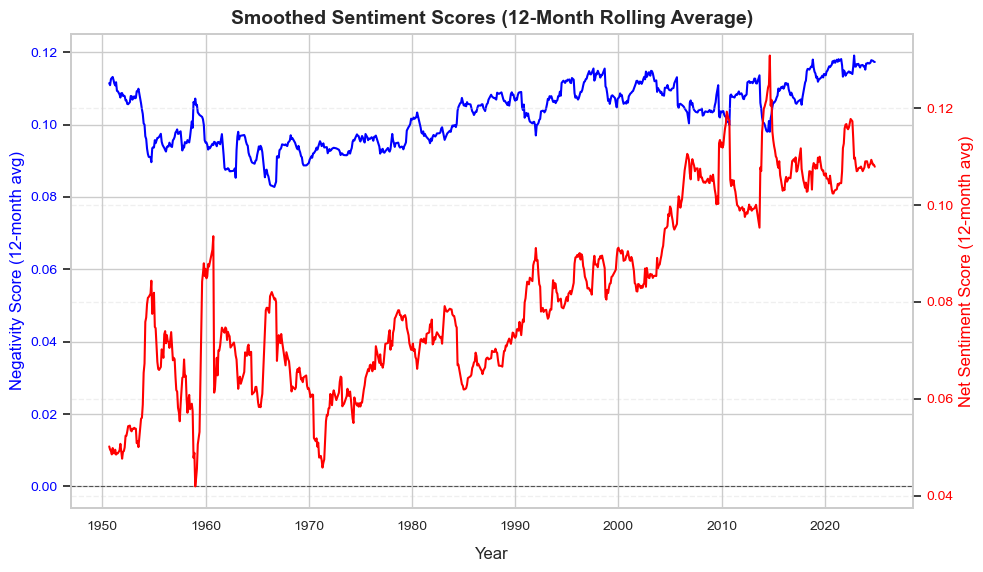

In [54]:
sentiment_by_month = speeches_with_sentiment.groupby(['month_year']).agg({'sentiment_score_1': ['mean', 'median', 'std'], 'sentiment_score_2': ['mean', 'median', 'std'], 'sentiment_score_2_positivity': ['mean', 'median', 'std'], 'sentiment_score_2_negativity': ['mean', 'median', 'std']}).reset_index()

sentiment_by_month.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in sentiment_by_month.columns]

# Ensure 'month_year' is a datetime object
sentiment_by_month['month_year'] = sentiment_by_month['month_year'].dt.to_timestamp()

# Applying 12-month rolling mean to the mean sentiment scores
sentiment_by_month['sentiment_score_1_smoothed'] = sentiment_by_month['sentiment_score_1_mean'].rolling(window=12).mean()
sentiment_by_month['sentiment_score_2_smoothed'] = sentiment_by_month['sentiment_score_2_mean'].rolling(window=12).mean()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create the plot with Seaborn styling
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sentiment Score 1 on the primary y-axis
ax1.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_1_smoothed'],
         color='blue', linewidth=1.5)
ax1.set_xlabel('Year', fontsize=12, labelpad=10)
ax1.set_ylabel('Negativity Score (12-month avg)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)

# Plot Sentiment Score 2 on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_smoothed'],
         color='red', linewidth=1.5)
ax2.set_ylabel('Net Sentiment Score (12-month avg)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=10)

# Adding a title and legends
fig.suptitle('Smoothed Sentiment Scores (12-Month Rolling Average)', fontsize=14, weight='bold', y=0.95)
ax1.legend(loc='upper left', fontsize=10, frameon=False)
ax2.legend(loc='upper right', fontsize=10, frameon=False)

# Enhancing gridlines and layout
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# save plot
fig.savefig('sentiment_scores_smoothed.png', dpi=300)

Calculate the increase since Germany's reunification

In [55]:
# Find the closest available date to October 1990 and September 2024
start_date = sentiment_by_month[sentiment_by_month['month_year'] >= '1990-10-01'].iloc[0]
end_date = sentiment_by_month[sentiment_by_month['month_year'] <= '2024-09-01'].iloc[-1]

# Extract the smoothed sentiment scores for the closest dates
start_score_1 = start_date['sentiment_score_1_smoothed']
end_score_1 = end_date['sentiment_score_1_smoothed']

start_score_2 = start_date['sentiment_score_2_smoothed']
end_score_2 = end_date['sentiment_score_2_smoothed']

# Calculate the differences
difference_score_1 = end_score_1/start_score_1 -1
difference_score_2 = end_score_2/start_score_2 -1

# Display the results
print("Increase in Negativity since Reunification: ", difference_score_1)
print("Increase in Net_sentiment  since Reunification: ", difference_score_2)

Increase in Negativity since Reunification:  0.13069679025968273
Increase in Net_sentiment  since Reunification:  0.41836155363357874


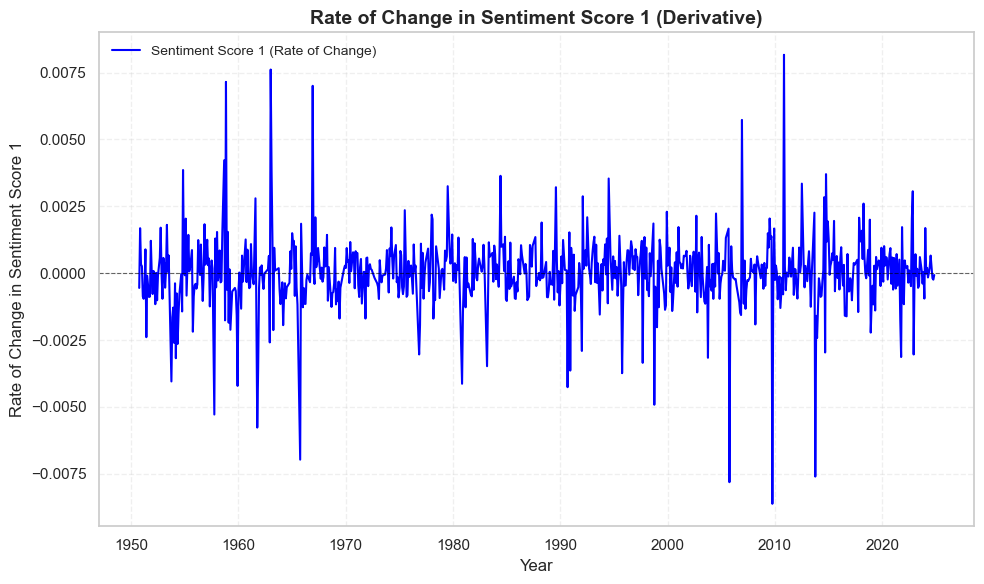

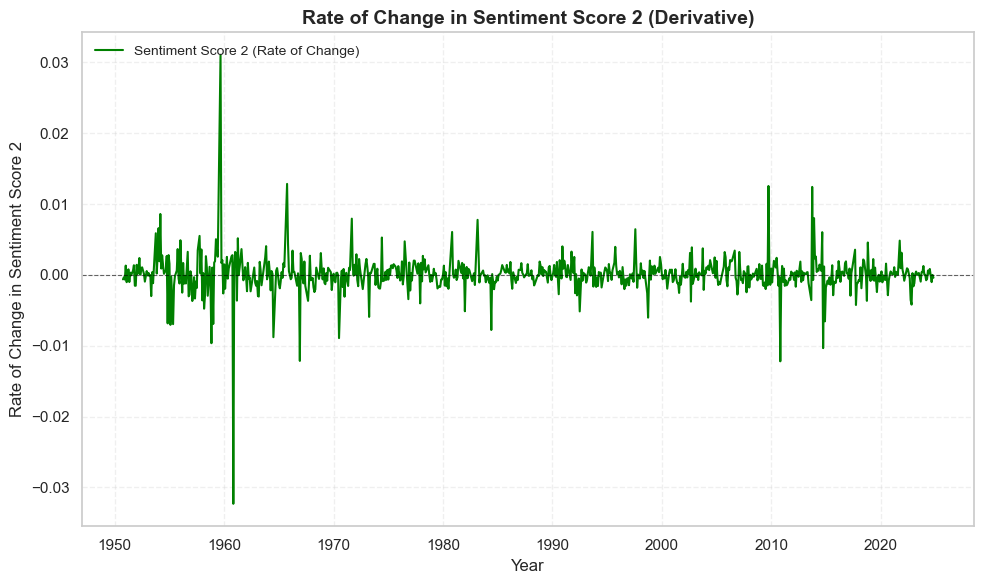

In [56]:
# Calculate the derivative (rate of change) for Sentiment Score 1
sentiment_by_month['sentiment_score_1_derivative'] = sentiment_by_month['sentiment_score_1_smoothed'].diff()
sentiment_by_month['sentiment_score_2_derivative'] = sentiment_by_month['sentiment_score_2_smoothed'].diff()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create a plot for the derivative of Sentiment Score 1
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_1_derivative'],
         color='blue', linewidth=1.5, label='Sentiment Score 1 (Rate of Change)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Sentiment Score 1', fontsize=12)
plt.title('Rate of Change in Sentiment Score 1 (Derivative)', fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_score_1_derivative.png', dpi=300)
plt.show()

# Create a plot for the derivative of Sentiment Score 2
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_derivative'],
         color='green', linewidth=1.5, label='Sentiment Score 2 (Rate of Change)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Sentiment Score 2', fontsize=12)
plt.title('Rate of Change in Sentiment Score 2 (Derivative)', fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_score_2_derivative.png', dpi=300)
plt.show()

Analyze the peaks

In [57]:
# Recalculate the derivative (rate of change) for Sentiment Score 2
sentiment_by_month['sentiment_score_2_derivative_not_smoothed'] = sentiment_by_month['sentiment_score_2_mean'].diff()

# Identify the top 3 peaks (positive and negative) for Sentiment Score 2 derivatives
top_peaks_up = sentiment_by_month.nlargest(10, 'sentiment_score_2_derivative_not_smoothed')[['month_year', 'sentiment_score_2_derivative_not_smoothed']]
top_peaks_down = sentiment_by_month.nsmallest(10, 'sentiment_score_2_derivative_not_smoothed')[['month_year', 'sentiment_score_2_derivative_not_smoothed']]

# Display the results
print("Top 10 Peaks (Positive):", top_peaks_up)
print("Top 10 Peaks (Negative):", top_peaks_down)


Top 10 Peaks (Positive):     month_year  sentiment_score_2_derivative_not_smoothed
106 1959-09-01                                   0.412555
664 2013-10-01                                   0.179982
621 2009-10-01                                   0.155311
165 1965-10-01                                   0.137141
87  1957-10-01                                   0.100926
44  1953-10-01                                   0.094964
339 1983-03-01                                   0.092776
435 1992-09-01                                   0.092421
215 1970-09-01                                   0.089772
317 1980-11-01                                   0.085360
Top 10 Peaks (Negative):     month_year  sentiment_score_2_derivative_not_smoothed
107 1959-10-01                                  -0.406523
166 1965-11-01                                  -0.175059
88  1957-11-01                                  -0.139729
665 2013-11-01                                  -0.133337
622 2009-11-01        

### 3.1.1 Mean with Sentiment Score 2 divided into Positivity and Negativity

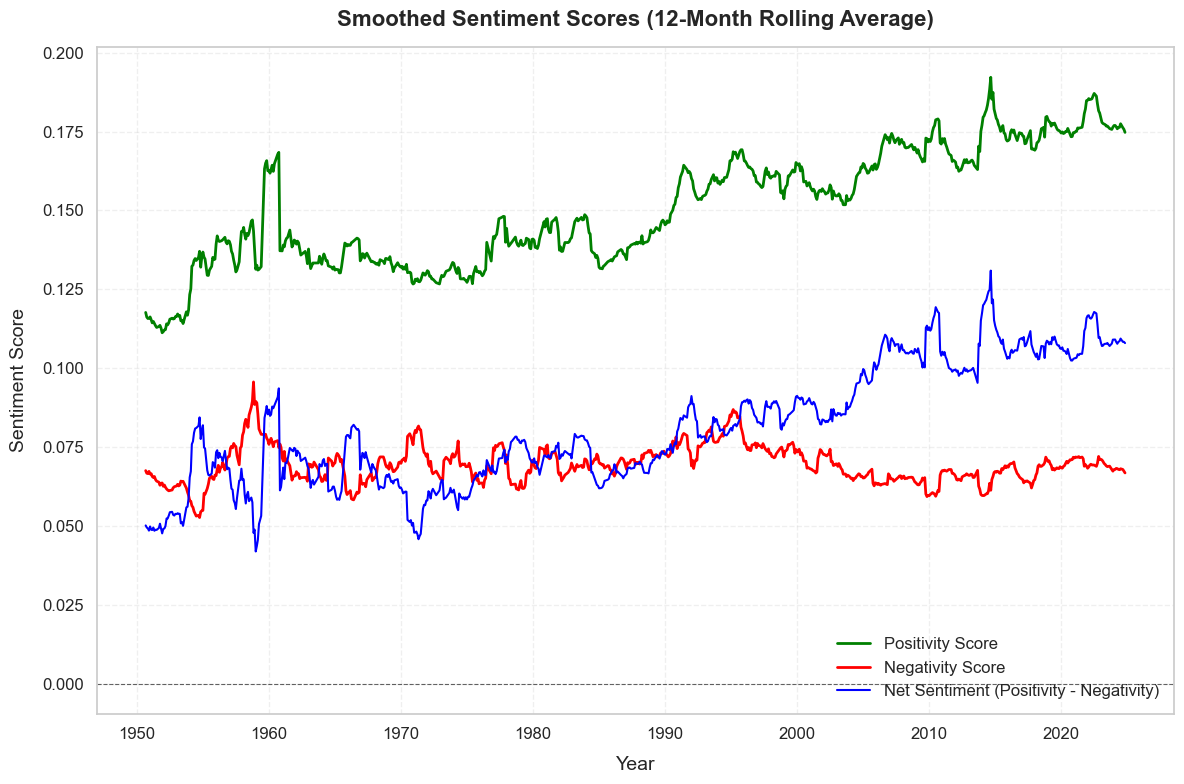

In [58]:
# Applying 12-month rolling mean to the mean sentiment scores
sentiment_by_month['positivity_smoothed'] = sentiment_by_month['sentiment_score_2_positivity_mean'].rolling(window=12).mean()
sentiment_by_month['negativity_smoothed'] = sentiment_by_month['sentiment_score_2_negativity_mean'].rolling(window=12).mean()
sentiment_by_month['net_sentiment_smoothed'] = sentiment_by_month['sentiment_score_2_mean'].rolling(window=12).mean()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create the plot with Seaborn styling
plt.figure(figsize=(12, 8))

# Plot positivity, negativity, total sentiment, and net sentiment scores on the same axis
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['positivity_smoothed'],
         label='Positivity Score', color='green', linewidth=2)
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['negativity_smoothed'],
         label='Negativity Score', color='red', linewidth=2)

plt.plot(sentiment_by_month['month_year'], sentiment_by_month['net_sentiment_smoothed'],
         label='Net Sentiment (Positivity - Negativity)', color='blue', linewidth=1.5)

# Adding labels, title, and legend
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Sentiment Score', fontsize=14, labelpad=10)
plt.title('Smoothed Sentiment Scores (12-Month Rolling Average)', fontsize=16, weight='bold', pad=15)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)  # Reference line at 0
plt.legend(fontsize=12, loc='lower right', frameon=False)

# Enhance x-axis ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()



# Save the plot
plt.savefig('sentiment_scores_with_total_and_net_smoothed.png', dpi=300)
# Show the plot
plt.show()


In [10]:
# calculate standard deviation of sentiment scores
standard_deviations = speeches_with_sentiment.agg({'sentiment_score_2_positivity': ['std'], 'sentiment_score_2_negativity': ['std']}).reset_index()
standard_deviations

index  sentiment_score_2_positivity  sentiment_score_2_negativity
0   std                      0.144169                      0.107992

In [59]:
# Find the closest available date to October 1990 and September 2024
start_date = sentiment_by_month[sentiment_by_month['month_year'] >= '1990-10-01'].iloc[0]
end_date = sentiment_by_month[sentiment_by_month['month_year'] <= '2024-03-01'].iloc[-1]

# Extract the smoothed sentiment scores for the closest dates
start_score_1 = start_date['positivity_smoothed']
end_score_1 = end_date['positivity_smoothed']

start_score_2 = start_date['negativity_smoothed']
end_score_2 = end_date['negativity_smoothed']

start_score_net = start_date['net_sentiment_smoothed']
end_score_net = end_date['net_sentiment_smoothed']

# Calculate the differences
difference_score_1 = end_score_1/start_score_1 -1
difference_score_2 = end_score_2/start_score_2 -1
difference_net = end_score_net/start_score_net -1


# Display the results
print("Increase in Positivity since Reunification: ", difference_score_1)
print("Increase in Negativity since Reunification: ", difference_score_2)
print("Change in Net Sentiment since Reunification: ", difference_net)

Increase in Positivity since Reunification:  0.1616000688122572
Increase in Negativity since Reunification:  -0.09741623797191468
Change in Net Sentiment since Reunification:  0.4178667660657107


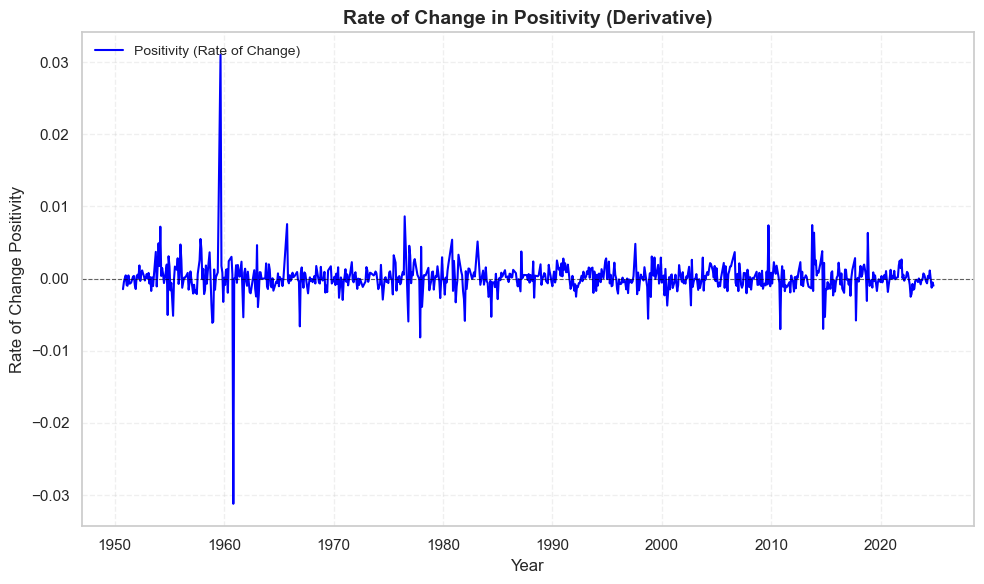

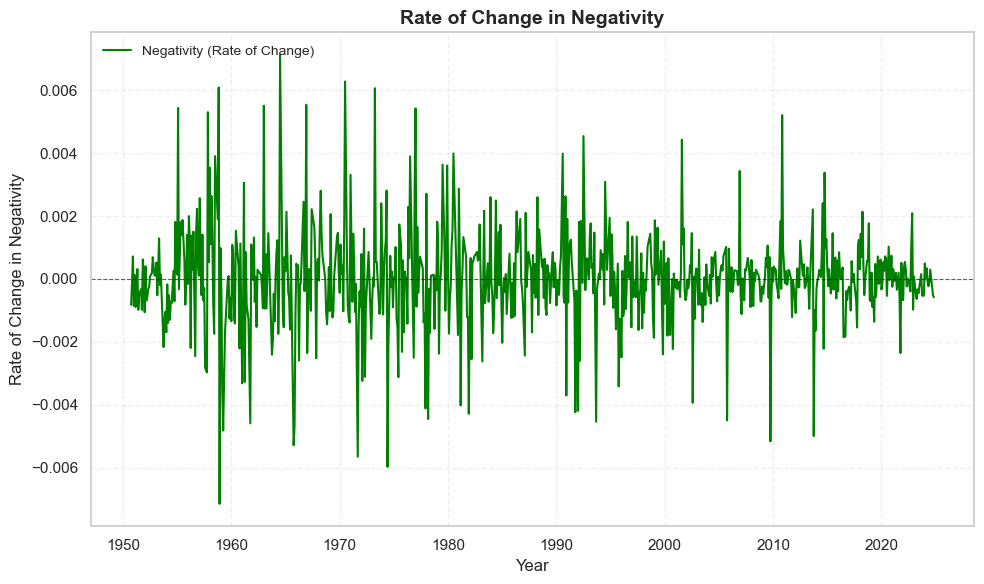

In [12]:
# Calculate the derivative (rate of change) for Sentiment Score 1
sentiment_by_month['positivity_change'] = sentiment_by_month['positivity_smoothed'].diff()
sentiment_by_month['negativity_change'] = sentiment_by_month['negativity_smoothed'].diff()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create a plot for the derivative of Sentiment Score 1
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['positivity_change'],
         color='blue', linewidth=1.5, label='Positivity (Rate of Change)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change Positivity', fontsize=12)
plt.title('Rate of Change in Positivity (Derivative)', fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('positivity_change.png', dpi=300)
plt.show()

# Create a plot for the derivative of Sentiment Score 2
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['negativity_change'],
         color='green', linewidth=1.5, label='Negativity (Rate of Change)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Negativity', fontsize=12)
plt.title('Rate of Change in Negativity', fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('negativity_change.png', dpi=300)
plt.show()

In [13]:
# Recalculate the derivative (rate of change) for Sentiment Score 2
sentiment_by_month['sentiment_score_2_positivity_mean'] = sentiment_by_month['sentiment_score_2_positivity_mean'].diff()

# Identify the top 3 peaks (positive and negative) for Sentiment Score 2 derivatives
top_peaks_up = sentiment_by_month.nlargest(10, 'sentiment_score_2_positivity_mean')[['month_year', 'sentiment_score_2_positivity_mean']]
top_peaks_down = sentiment_by_month.nsmallest(10, 'sentiment_score_2_positivity_mean')[['month_year', 'sentiment_score_2_positivity_mean']]

# Display the results
print("Top 10 Peaks (Positive):", top_peaks_up)
print("Top 10 Peaks (Negative):", top_peaks_down)


Top 10 Peaks (Positive):     month_year  sentiment_score_2_positivity_mean
106 1959-09-01                           0.384634
664 2013-10-01                           0.111873
276 1976-07-01                           0.095526
278 1976-12-01                           0.088939
128 1961-11-01                           0.087513
165 1965-10-01                           0.086356
621 2009-10-01                           0.084834
710 2017-11-01                           0.077131
666 2013-12-01                           0.069212
44  1953-10-01                           0.067751
Top 10 Peaks (Negative):     month_year  sentiment_score_2_positivity_mean
107 1959-10-01                          -0.382348
277 1976-11-01                          -0.132000
318 1980-12-01                          -0.110401
709 2017-10-01                          -0.109608
665 2013-11-01                          -0.093904
166 1965-11-01                          -0.093617
622 2009-11-01                          -0.077546


### 3.1.2 Standard Deviation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


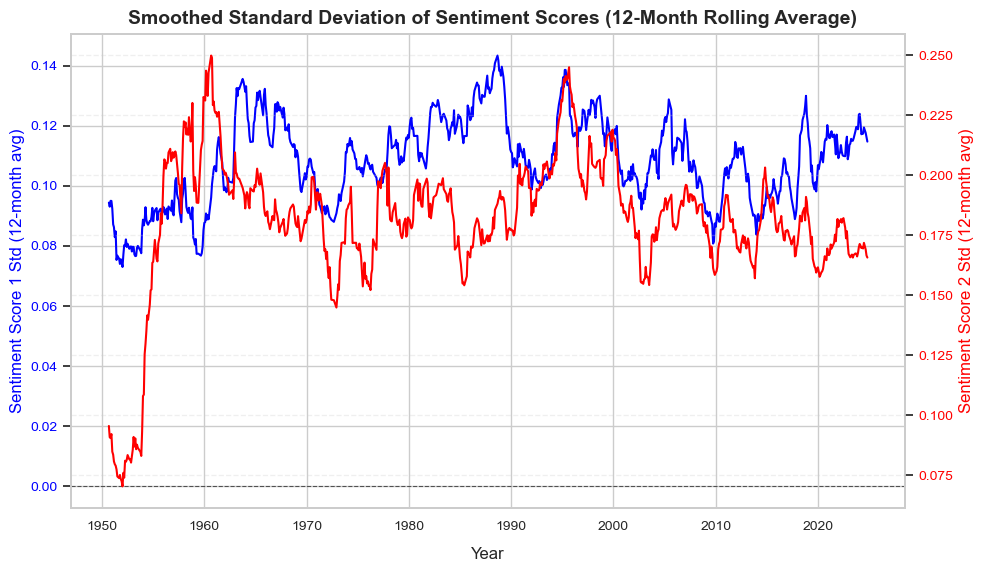

In [14]:
# Applying 12-month rolling mean to the standard deviation of sentiment scores
sentiment_by_month['sentiment_score_1_std_smoothed'] = sentiment_by_month['sentiment_score_1_std'].rolling(window=12).mean()
sentiment_by_month['sentiment_score_2_std_smoothed'] = sentiment_by_month['sentiment_score_2_std'].rolling(window=12).mean()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create the plot with Seaborn styling
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the smoothed standard deviation for Sentiment Score 1
ax1.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_1_std_smoothed'],
         color='blue', linewidth=1.5)
ax1.set_xlabel('Year', fontsize=12, labelpad=10)
ax1.set_ylabel('Sentiment Score 1 Std (12-month avg)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)

# Plot the smoothed standard deviation for Sentiment Score 2 on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_std_smoothed'],
         color='red', linewidth=1.5)
ax2.set_ylabel('Sentiment Score 2 Std (12-month avg)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=10)

# Adding a title and legends
fig.suptitle('Smoothed Standard Deviation of Sentiment Scores (12-Month Rolling Average)', fontsize=14, weight='bold', y=0.95)
ax1.legend(loc='upper left', fontsize=10, frameon=False)
ax2.legend(loc='upper right', fontsize=10, frameon=False)

# Enhancing gridlines and layout
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the plot
fig.savefig('sentiment_scores_std_smoothed.png', dpi=300)
plt.show()

In [15]:
# Identify the top 10 peaks (positive and negative) for Sentiment Score 1 and 2 
top_peaks_up_std_score1 = sentiment_by_month.nlargest(10, 'sentiment_score_1_std')[['month_year', 'sentiment_score_1_std']]
top_peaks_down_std_score1 = sentiment_by_month.nsmallest(10, 'sentiment_score_1_std')[['month_year', 'sentiment_score_1_std']]

# Display the results
print("Top 10 Peaks Up Std Score1:", top_peaks_up_std_score1)
print("Top 10 Peaks Down Std Score1:", top_peaks_down_std_score1)


top_peaks_up_std_score2 = sentiment_by_month.nlargest(10, 'sentiment_score_2_std')[['month_year', 'sentiment_score_2_std']]
top_peaks_down_std_score2 = sentiment_by_month.nsmallest(10, 'sentiment_score_2_std')[['month_year', 'sentiment_score_2_std']]
print("Top 10 Peaks Up Std Score2:", top_peaks_up_std_score2)
print("Top 10 Peaks Down Std Score2:", top_peaks_down_std_score2)


Top 10 Peaks Up Std Score1:     month_year  sentiment_score_1_std
456 1994-07-01               0.254056
566 2004-07-01               0.221204
715 2018-04-01               0.216796
580 2005-12-01               0.190471
156 1964-11-01               0.188319
463 1995-04-01               0.184894
416 1990-11-01               0.183582
475 1996-05-01               0.183556
382 1987-09-01               0.180482
88  1957-11-01               0.179718
Top 10 Peaks Down Std Score1:     month_year  sentiment_score_1_std
402 1989-08-01               0.024940
87  1957-10-01               0.026665
621 2009-10-01               0.028200
97  1958-09-01               0.028465
165 1965-10-01               0.030007
729 2019-07-01               0.034589
277 1976-11-01               0.042121
127 1961-10-01               0.043426
544 2002-08-01               0.046616
126 1961-08-01               0.048816
Top 10 Peaks Up Std Score2:     month_year  sentiment_score_2_std
106 1959-09-01               0.471562
88

In [16]:
# Define all electoral term periods
electoral_terms = [
    {'term': '1st', 'start': '1949-09-07', 'end': '1953-10-06'},
    {'term': '2nd', 'start': '1953-10-06', 'end': '1957-10-15'},
    {'term': '3rd', 'start': '1957-10-15', 'end': '1961-10-17'},
    {'term': '4th', 'start': '1961-10-17', 'end': '1965-10-19'},
    {'term': '5th', 'start': '1965-10-19', 'end': '1969-10-20'},
    {'term': '6th', 'start': '1969-10-20', 'end': '1972-12-13'},
    {'term': '7th', 'start': '1972-12-13', 'end': '1976-12-14'},
    {'term': '8th', 'start': '1976-12-14', 'end': '1980-11-04'},
    {'term': '9th', 'start': '1980-11-04', 'end': '1983-03-29'},
    {'term': '10th', 'start': '1983-03-29', 'end': '1987-02-18'},
    {'term': '11th', 'start': '1987-02-18', 'end': '1990-12-20'},
    {'term': '12th', 'start': '1990-12-20', 'end': '1994-11-10'},
    {'term': '13th', 'start': '1994-11-10', 'end': '1998-10-26'},
    {'term': '14th', 'start': '1998-10-26', 'end': '2002-10-17'},
    {'term': '15th', 'start': '2002-10-17', 'end': '2005-10-18'},
    {'term': '16th', 'start': '2005-10-18', 'end': '2009-10-27'},
    {'term': '17th', 'start': '2009-10-27', 'end': '2013-10-22'},
    {'term': '18th', 'start': '2013-10-22', 'end': '2017-10-24'},
    {'term': '19th', 'start': '2017-10-24', 'end': '2021-10-26'},
    {'term': '20th', 'start': '2021-10-26', 'end': '2025-10-26'}
]

# Convert start and end dates to datetime
for term in electoral_terms:
    term['start'] = pd.to_datetime(term['start'])
    term['end'] = pd.to_datetime(term['end'])

# Ensure the date column in speeches_with_sentiment is datetime
speeches_with_sentiment['date'] = pd.to_datetime(speeches_with_sentiment['date'])

# Calculate standard deviation for each electoral term
results = []
previous_std_dev = None  # To calculate the difference from the previous term

for term in electoral_terms:
    # Filter data for the current electoral term
    mask = (speeches_with_sentiment['date'] >= term['start']) & (speeches_with_sentiment['date'] <= term['end'])
    term_data = speeches_with_sentiment.loc[mask]

    # Calculate standard deviation of sentiment scores
    std_dev = term_data['sentiment_score_1'].std()
    difference_from_previous = std_dev / previous_std_dev -1 if previous_std_dev is not None else None
    previous_std_dev = std_dev

    # Append results
    results.append({
        'term': term['term'],
        'date_range': f"{term['start'].date()} - {term['end'].date()}",
        'average_std_dev': std_dev,
        'difference_from_previous': difference_from_previous
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Average Standard Deviation per Electoral Term with Differences:")
print(results_df)


Average Standard Deviation per Electoral Term with Differences:
    term               date_range  average_std_dev  difference_from_previous
0    1st  1949-09-07 - 1953-10-06         0.087408                       NaN
1    2nd  1953-10-06 - 1957-10-15         0.096329                  0.102068
2    3rd  1957-10-15 - 1961-10-17         0.103961                  0.079232
3    4th  1961-10-17 - 1965-10-19         0.132545                  0.274942
4    5th  1965-10-19 - 1969-10-20         0.120301                 -0.092373
5    6th  1969-10-20 - 1972-12-13         0.101080                 -0.159774
6    7th  1972-12-13 - 1976-12-14         0.113139                  0.119301
7    8th  1976-12-14 - 1980-11-04         0.117566                  0.039127
8    9th  1980-11-04 - 1983-03-29         0.123071                  0.046823
9   10th  1983-03-29 - 1987-02-18         0.129990                  0.056217
10  11th  1987-02-18 - 1990-12-20         0.129029                 -0.007393
11  12th  19

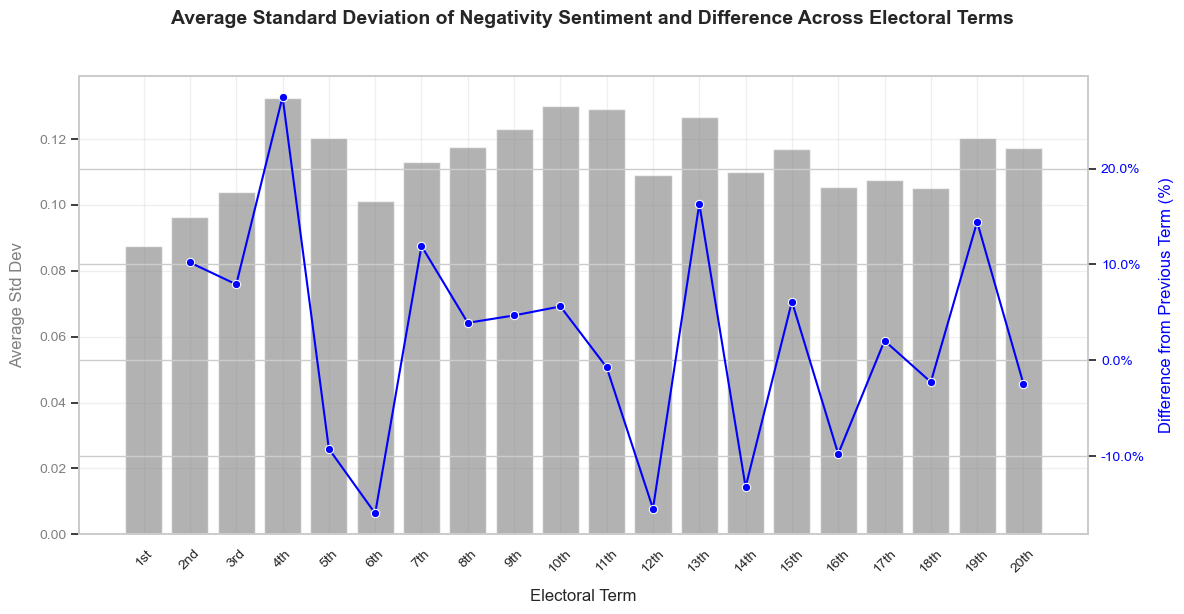

In [17]:
from matplotlib.ticker import FuncFormatter

# Set Seaborn style for academic papers
sns.set_theme(style="whitegrid")

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average standard deviation
sns.barplot(
    x="term",
    y="average_std_dev",
    data=results_df,
    ax=ax1,
    color='grey',
    alpha=0.6
)
ax1.set_xlabel('Electoral Term', fontsize=12, labelpad=10)
ax1.set_ylabel('Average Std Dev', fontsize=12, color='grey', labelpad=10)
ax1.tick_params(axis='y', labelcolor='grey', labelsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)

# Line plot for difference from previous term on secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    x="term",
    y="difference_from_previous",
    data=results_df,
    ax=ax2,
    color='blue',
    marker='o'
)
ax2.set_ylabel('Difference from Previous Term (%)', fontsize=12, color='blue', labelpad=10)

ax2.tick_params(axis='y', labelcolor='blue', labelsize=10)

# Format right axis as percentage
def to_percent(value, _):
    return f"{value * 100:.1f}%"

ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Title and layout adjustments
fig.suptitle(
    'Average Standard Deviation of Negativity Sentiment and Difference Across Electoral Terms',
    fontsize=14,
    weight='bold',
    y=1.02
)
ax1.grid(alpha=0.3)
plt.tight_layout()

#save plot
fig.savefig('average_std_deviation_negativity_electoral_term.png', dpi=300)

# Show the plot
plt.show()




### 3.1.2 Standard deviation with Score 2

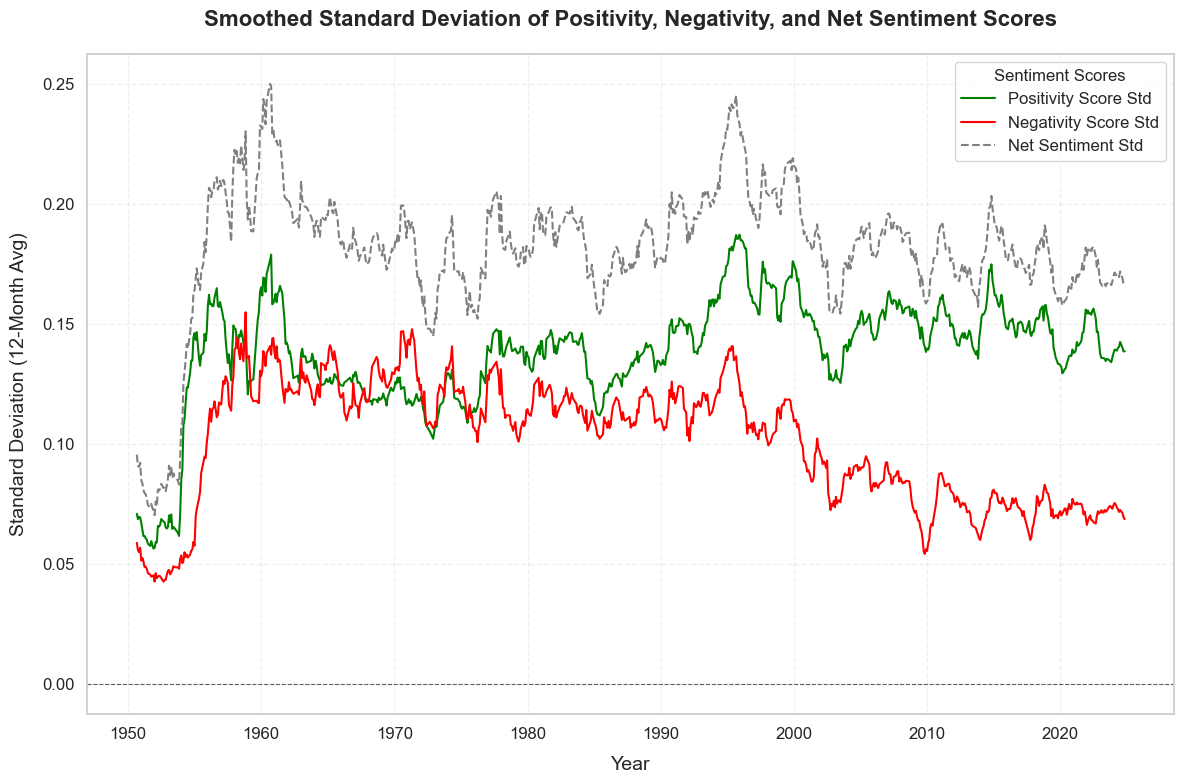

In [18]:
# Applying 12-month rolling mean to the standard deviation of sentiment scores
sentiment_by_month['sentiment_score_2_positivity_std_smoothed'] = sentiment_by_month['sentiment_score_2_positivity_std'].rolling(window=12).mean()
sentiment_by_month['sentiment_score_2_negativity_std_smoothed'] = sentiment_by_month['sentiment_score_2_negativity_std'].rolling(window=12).mean()
sentiment_by_month['sentiment_score_2_std_smoothed'] = sentiment_by_month['sentiment_score_2_std'].rolling(window=12).mean()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create the plot with Seaborn styling
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the smoothed standard deviation for Positivity Score
ax.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_positivity_std_smoothed'],
        color='green', linewidth=1.5, label='Positivity Score Std')

# Plot the smoothed standard deviation for Negativity Score
ax.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_negativity_std_smoothed'],
        color='red', linewidth=1.5, label='Negativity Score Std')

# Plot the smoothed standard deviation for Total Sentiment Score
ax.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_std_smoothed'],
        color='grey', linewidth=1.5, linestyle='--', label='Net Sentiment Std')

# Adding labels and title
ax.set_xlabel('Year', fontsize=14, labelpad=10)
ax.set_ylabel('Standard Deviation (12-Month Avg)', fontsize=14, labelpad=10)
ax.set_title('Smoothed Standard Deviation of Positivity, Negativity, and Net Sentiment Scores', 
             fontsize=16, weight='bold', pad=20)

# Adding gridlines
ax.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
ax.grid(alpha=0.3, linestyle='--')

# Adding legend
ax.legend(loc='upper right', fontsize=12, title='Sentiment Scores', title_fontsize=12)

# Enhancing layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_scores_std_smoothed_with_total.png', dpi=300)
plt.show()


In [19]:
# Define all electoral term periods
electoral_terms = [
    {'term': '1st', 'start': '1949-09-07', 'end': '1953-10-06'},
    {'term': '2nd', 'start': '1953-10-06', 'end': '1957-10-15'},
    {'term': '3rd', 'start': '1957-10-15', 'end': '1961-10-17'},
    {'term': '4th', 'start': '1961-10-17', 'end': '1965-10-19'},
    {'term': '5th', 'start': '1965-10-19', 'end': '1969-10-20'},
    {'term': '6th', 'start': '1969-10-20', 'end': '1972-12-13'},
    {'term': '7th', 'start': '1972-12-13', 'end': '1976-12-14'},
    {'term': '8th', 'start': '1976-12-14', 'end': '1980-11-04'},
    {'term': '9th', 'start': '1980-11-04', 'end': '1983-03-29'},
    {'term': '10th', 'start': '1983-03-29', 'end': '1987-02-18'},
    {'term': '11th', 'start': '1987-02-18', 'end': '1990-12-20'},
    {'term': '12th', 'start': '1990-12-20', 'end': '1994-11-10'},
    {'term': '13th', 'start': '1994-11-10', 'end': '1998-10-26'},
    {'term': '14th', 'start': '1998-10-26', 'end': '2002-10-17'},
    {'term': '15th', 'start': '2002-10-17', 'end': '2005-10-18'},
    {'term': '16th', 'start': '2005-10-18', 'end': '2009-10-27'},
    {'term': '17th', 'start': '2009-10-27', 'end': '2013-10-22'},
    {'term': '18th', 'start': '2013-10-22', 'end': '2017-10-24'},
    {'term': '19th', 'start': '2017-10-24', 'end': '2021-10-26'},
    {'term': '20th', 'start': '2021-10-26', 'end': '2025-10-26'}
]

# Convert start and end dates to datetime
for term in electoral_terms:
    term['start'] = pd.to_datetime(term['start'])
    term['end'] = pd.to_datetime(term['end'])

# Ensure the date column in speeches_with_sentiment is datetime
speeches_with_sentiment['date'] = pd.to_datetime(speeches_with_sentiment['date'])

# Calculate standard deviation for each electoral term
results = []
previous_std_dev = None  # To calculate the difference from the previous term

for term in electoral_terms:
    # Filter data for the current electoral term
    mask = (speeches_with_sentiment['date'] >= term['start']) & (speeches_with_sentiment['date'] <= term['end'])
    term_data = speeches_with_sentiment.loc[mask]

    # Calculate standard deviation of sentiment scores
    std_dev = term_data['sentiment_score_2_positivity'].std()
    difference_from_previous = std_dev / previous_std_dev -1 if previous_std_dev is not None else None
    previous_std_dev = std_dev

    # Append results
    results.append({
        'term': term['term'],
        'date_range': f"{term['start'].date()} - {term['end'].date()}",
        'average_std_dev': std_dev,
        'difference_from_previous': difference_from_previous
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Average Standard Deviation (sentiment Score 2 Positivity) per Electoral Term with Differences:")
print(results_df)


Average Standard Deviation (sentiment Score 2 Positivity) per Electoral Term with Differences:
    term               date_range  average_std_dev  difference_from_previous
0    1st  1949-09-07 - 1953-10-06         0.067643                       NaN
1    2nd  1953-10-06 - 1957-10-15         0.144735                  1.139685
2    3rd  1957-10-15 - 1961-10-17         0.152205                  0.051612
3    4th  1961-10-17 - 1965-10-19         0.130844                 -0.140342
4    5th  1965-10-19 - 1969-10-20         0.123229                 -0.058201
5    6th  1969-10-20 - 1972-12-13         0.121359                 -0.015172
6    7th  1972-12-13 - 1976-12-14         0.124404                  0.025084
7    8th  1976-12-14 - 1980-11-04         0.135903                  0.092434
8    9th  1980-11-04 - 1983-03-29         0.144417                  0.062653
9   10th  1983-03-29 - 1987-02-18         0.127744                 -0.115454
10  11th  1987-02-18 - 1990-12-20         0.144556        

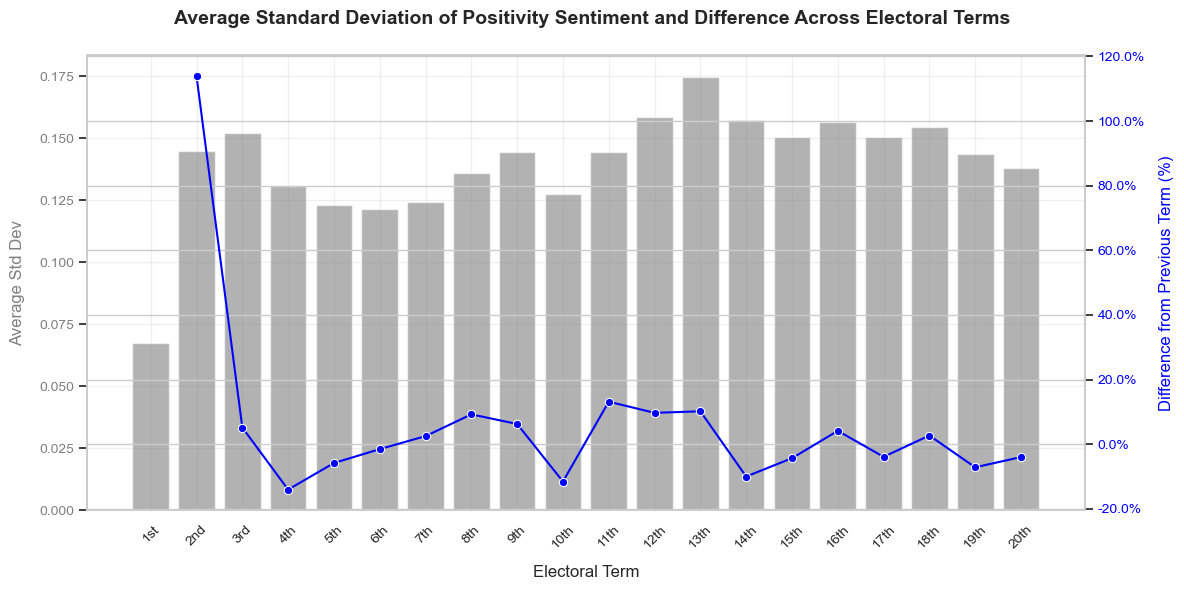

In [20]:

# Set Seaborn style for academic papers
sns.set_theme(style="whitegrid")

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average standard deviation
sns.barplot(
    x="term",
    y="average_std_dev",
    data=results_df,
    ax=ax1,
    color='grey',
    alpha=0.6
)
ax1.set_xlabel('Electoral Term', fontsize=12, labelpad=10)
ax1.set_ylabel('Average Std Dev', fontsize=12, color='grey', labelpad=10)
ax1.tick_params(axis='y', labelcolor='grey', labelsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)

# Line plot for difference from previous term on secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    x="term",
    y="difference_from_previous",
    data=results_df,
    ax=ax2,
    color='blue',
    marker='o'
)
ax2.set_ylabel('Difference from Previous Term (%)', fontsize=12, color='blue', labelpad=10)

ax2.tick_params(axis='y', labelcolor='blue', labelsize=10)

# Format right axis as percentage
def to_percent(value, _):
    return f"{value * 100:.1f}%"

ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Title and layout adjustments
fig.suptitle(
    'Average Standard Deviation of Positivity Sentiment and Difference Across Electoral Terms',
    fontsize=14,
    weight='bold',
)
ax1.grid(alpha=0.3)
plt.tight_layout()

#save plot
fig.savefig('average_std_deviation_positivity_electoral_term.png', dpi=300)

# Show the plot
plt.show()

In [21]:
# Define all electoral term periods
electoral_terms = [
    {'term': '1st', 'start': '1949-09-07', 'end': '1953-10-06'},
    {'term': '2nd', 'start': '1953-10-06', 'end': '1957-10-15'},
    {'term': '3rd', 'start': '1957-10-15', 'end': '1961-10-17'},
    {'term': '4th', 'start': '1961-10-17', 'end': '1965-10-19'},
    {'term': '5th', 'start': '1965-10-19', 'end': '1969-10-20'},
    {'term': '6th', 'start': '1969-10-20', 'end': '1972-12-13'},
    {'term': '7th', 'start': '1972-12-13', 'end': '1976-12-14'},
    {'term': '8th', 'start': '1976-12-14', 'end': '1980-11-04'},
    {'term': '9th', 'start': '1980-11-04', 'end': '1983-03-29'},
    {'term': '10th', 'start': '1983-03-29', 'end': '1987-02-18'},
    {'term': '11th', 'start': '1987-02-18', 'end': '1990-12-20'},
    {'term': '12th', 'start': '1990-12-20', 'end': '1994-11-10'},
    {'term': '13th', 'start': '1994-11-10', 'end': '1998-10-26'},
    {'term': '14th', 'start': '1998-10-26', 'end': '2002-10-17'},
    {'term': '15th', 'start': '2002-10-17', 'end': '2005-10-18'},
    {'term': '16th', 'start': '2005-10-18', 'end': '2009-10-27'},
    {'term': '17th', 'start': '2009-10-27', 'end': '2013-10-22'},
    {'term': '18th', 'start': '2013-10-22', 'end': '2017-10-24'},
    {'term': '19th', 'start': '2017-10-24', 'end': '2021-10-26'},
    {'term': '20th', 'start': '2021-10-26', 'end': '2025-10-26'}
]

# Convert start and end dates to datetime
for term in electoral_terms:
    term['start'] = pd.to_datetime(term['start'])
    term['end'] = pd.to_datetime(term['end'])

# Ensure the date column in speeches_with_sentiment is datetime
speeches_with_sentiment['date'] = pd.to_datetime(speeches_with_sentiment['date'])

# Calculate standard deviation for each electoral term
results = []
previous_std_dev = None  # To calculate the difference from the previous term

for term in electoral_terms:
    # Filter data for the current electoral term
    mask = (speeches_with_sentiment['date'] >= term['start']) & (speeches_with_sentiment['date'] <= term['end'])
    term_data = speeches_with_sentiment.loc[mask]

    # Calculate standard deviation of sentiment scores
    std_dev = term_data['sentiment_score_2_negativity'].std()
    difference_from_previous = std_dev / previous_std_dev -1 if previous_std_dev is not None else None
    previous_std_dev = std_dev

    # Append results
    results.append({
        'term': term['term'],
        'date_range': f"{term['start'].date()} - {term['end'].date()}",
        'average_std_dev': std_dev,
        'difference_from_previous': difference_from_previous
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Average Standard Deviation (sentiment Score 2 Negativity) per Electoral Term with Differences:")
print(results_df)


Average Standard Deviation (sentiment Score 2 Negativity) per Electoral Term with Differences:
    term               date_range  average_std_dev  difference_from_previous
0    1st  1949-09-07 - 1953-10-06         0.052747                       NaN
1    2nd  1953-10-06 - 1957-10-15         0.120872                  1.291542
2    3rd  1957-10-15 - 1961-10-17         0.154148                  0.275303
3    4th  1961-10-17 - 1965-10-19         0.133161                 -0.136147
4    5th  1965-10-19 - 1969-10-20         0.129010                 -0.031173
5    6th  1969-10-20 - 1972-12-13         0.128073                 -0.007261
6    7th  1972-12-13 - 1976-12-14         0.123026                 -0.039406
7    8th  1976-12-14 - 1980-11-04         0.115643                 -0.060016
8    9th  1980-11-04 - 1983-03-29         0.119690                  0.034993
9   10th  1983-03-29 - 1987-02-18         0.114108                 -0.046637
10  11th  1987-02-18 - 1990-12-20         0.118706        

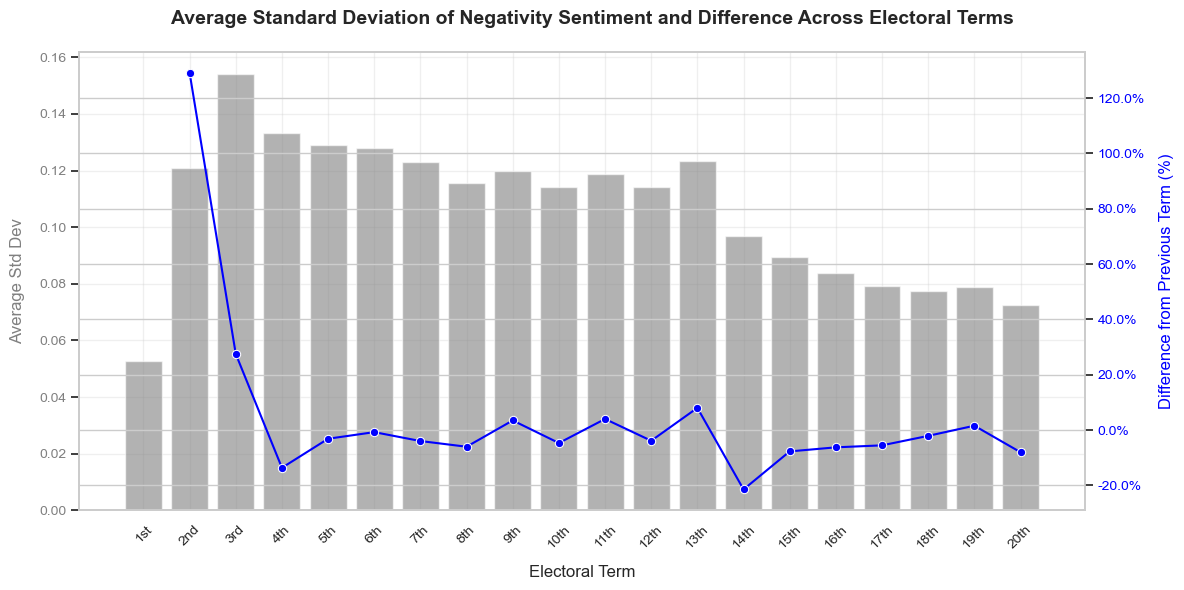

In [22]:

# Set Seaborn style for academic papers
sns.set_theme(style="whitegrid")

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average standard deviation
sns.barplot(
    x="term",
    y="average_std_dev",
    data=results_df,
    ax=ax1,
    color='grey',
    alpha=0.6
)
ax1.set_xlabel('Electoral Term', fontsize=12, labelpad=10)
ax1.set_ylabel('Average Std Dev', fontsize=12, color='grey', labelpad=10)
ax1.tick_params(axis='y', labelcolor='grey', labelsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)

# Line plot for difference from previous term on secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    x="term",
    y="difference_from_previous",
    data=results_df,
    ax=ax2,
    color='blue',
    marker='o'
)
ax2.set_ylabel('Difference from Previous Term (%)', fontsize=12, color='blue', labelpad=10)

ax2.tick_params(axis='y', labelcolor='blue', labelsize=10)

# Format right axis as percentage
def to_percent(value, _):
    return f"{value * 100:.1f}%"

ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Title and layout adjustments
fig.suptitle(
    'Average Standard Deviation of Negativity Sentiment and Difference Across Electoral Terms',
    fontsize=14,
    weight='bold',
)
ax1.grid(alpha=0.3)
plt.tight_layout()

#save plot
fig.savefig('average_std_deviation_negativity_electoral_term.png', dpi=300)

# Show the plot
plt.show()

### Below: Not relevant, no interesting insights!

Summary statistics by governing faction:
                 governing_faction      mean       std
0                          CDU/CSU  0.096622  0.103961
1                     CDU/CSU, FDP  0.103241  0.122273
2                 CDU/CSU, FDP, DP  0.108947  0.087408
3             CDU/CSU, FDP, GB/BHE  0.096509  0.096329
4                     CDU/CSU, SPD  0.109306  0.111262
5       SPD, Bündnis 90/Die Grünen  0.109140  0.112913
6                         SPD, FDP  0.095234  0.113981
7  SPD, FDP, Bündnis 90/Die Grünen  0.117133  0.117430
Correlation matrix:
                                 sentiment_score_1   CDU/CSU  CDU/CSU, FDP  \
sentiment_score_1                         1.000000 -0.009650     -0.004462   
CDU/CSU                                  -0.009650  1.000000     -0.131219   
CDU/CSU, FDP                             -0.004462 -0.131219      1.000000   
CDU/CSU, FDP, DP                          0.006571 -0.023259     -0.126885   
CDU/CSU, FDP, GB/BHE                     -0.009916 -0.

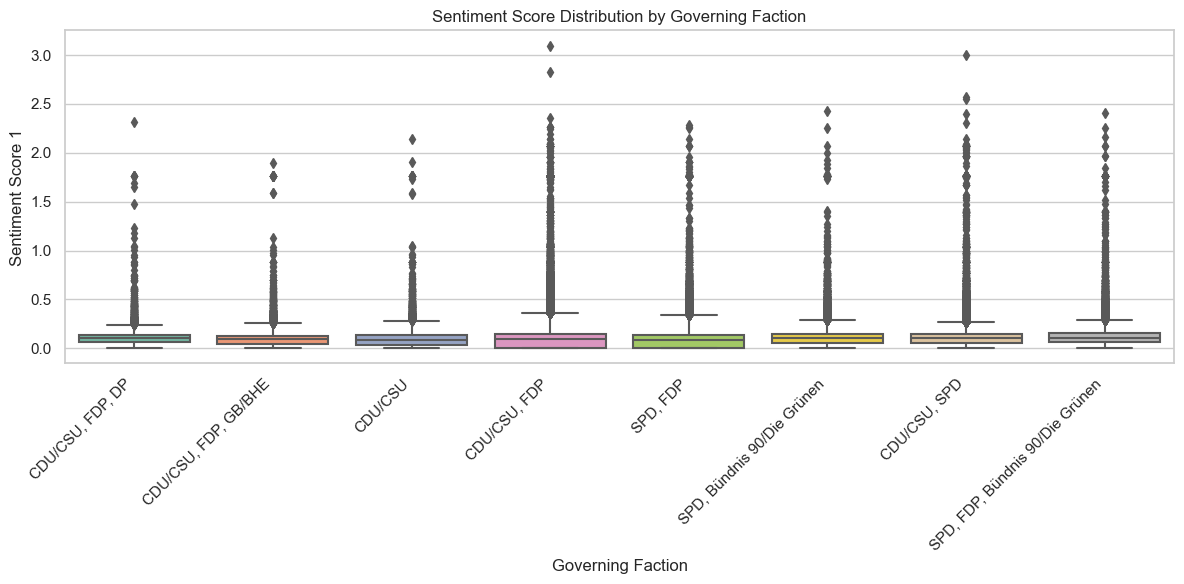

In [23]:
correlation_experiment = speeches_with_sentiment.copy()
# Map electoral terms to governing factions
regierung_mapping = {
    1: ['CDU/CSU', 'FDP', 'DP'],
    2: ['CDU/CSU', 'FDP', 'GB/BHE'],
    3: ['CDU/CSU'],
    4: ['CDU/CSU', 'FDP'],
    5: ['CDU/CSU', 'FDP'],
    6: ['SPD', 'FDP'],
    7: ['SPD', 'FDP'],
    8: ['SPD', 'FDP'],
    9: ['SPD', 'FDP'],
    10: ['CDU/CSU', 'FDP'],
    11: ['CDU/CSU', 'FDP'],
    12: ['CDU/CSU', 'FDP'],
    13: ['CDU/CSU', 'FDP'],
    14: ['SPD', 'Bündnis 90/Die Grünen'],
    15: ['SPD', 'Bündnis 90/Die Grünen'],
    16: ['CDU/CSU', 'SPD'],
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Add governing faction to the speeches data
def map_governing_faction(date):
    for term, parties in regierung_mapping.items():
        term_data = electoral_terms[term - 1]  # Electoral terms are 0-indexed in the list
        start, end = pd.to_datetime(term_data['start']), pd.to_datetime(term_data['end'])
        if start <= date <= end:
            return ', '.join(parties)
    return None

correlation_experiment['governing_faction'] = correlation_experiment['date'].apply(map_governing_faction)

# Summary statistics by governing faction
summary_stats = correlation_experiment.groupby('governing_faction')['sentiment_score_1'].agg(['mean', 'std']).reset_index()

print("Summary statistics by governing faction:")
print(summary_stats)

# Correlation analysis
coalition_dummies = pd.get_dummies(correlation_experiment['governing_faction'])
correlation_experiment = pd.concat([correlation_experiment, coalition_dummies], axis=1)
correlation_matrix = correlation_experiment[['sentiment_score_1'] + list(coalition_dummies.columns)].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualization: Boxplot of sentiment scores by governing faction
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='governing_faction',
    y='sentiment_score_1',
    data=correlation_experiment,
    palette='Set2'
)
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Score Distribution by Governing Faction')
plt.ylabel('Sentiment Score 1')
plt.xlabel('Governing Faction')
plt.tight_layout()
plt.show()


Correlation matrix (sentiment_score_1 and governing factions):
sentiment_score_1                            1.000000
coalition_CDU/CSU                           -0.009650
coalition_CDU/CSU, FDP                      -0.004462
coalition_CDU/CSU, FDP, DP                   0.006571
coalition_CDU/CSU, FDP, GB/BHE              -0.009916
coalition_CDU/CSU, SPD                       0.020934
coalition_SPD, Bündnis 90/Die Grünen         0.014450
coalition_SPD, FDP                          -0.036623
coalition_SPD, FDP, Bündnis 90/Die Grünen    0.028729
Name: sentiment_score_1, dtype: float64


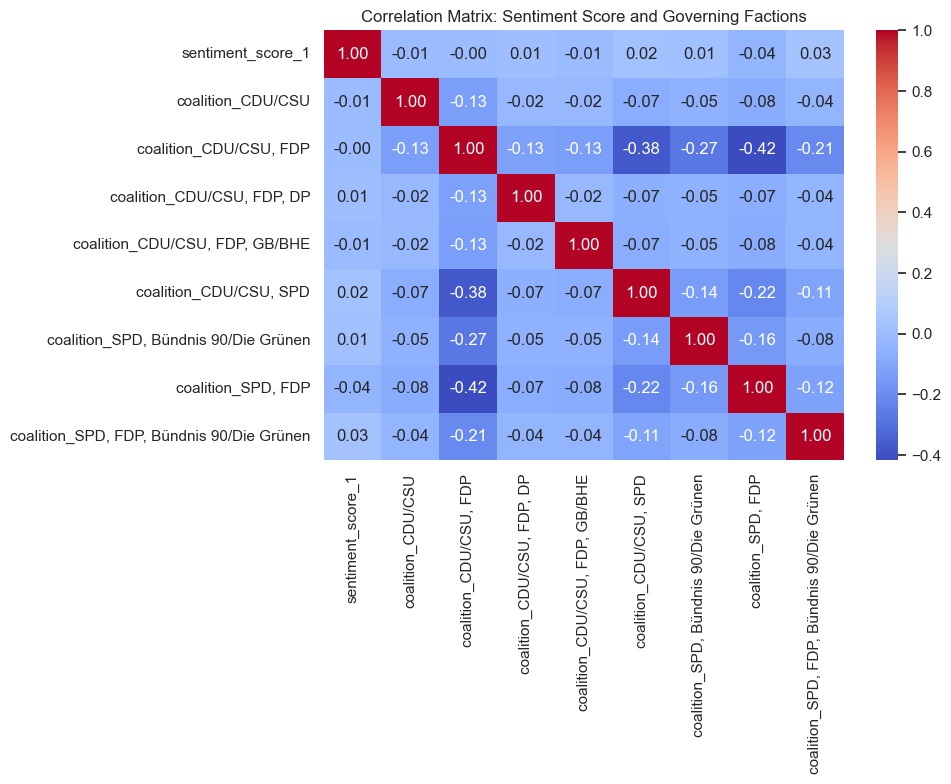

In [24]:
# Create dummy variables for governing factions
coalition_dummies = pd.get_dummies(correlation_experiment['governing_faction'], prefix='coalition')

# Combine sentiment scores with the dummy variables
correlation_data = pd.concat([correlation_experiment[['sentiment_score_1']], coalition_dummies], axis=1)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations specifically for 'sentiment_score_1'
sentiment_correlation = correlation_matrix.loc['sentiment_score_1']

# Display the correlation matrix
print("Correlation matrix (sentiment_score_1 and governing factions):")
print(sentiment_correlation)



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix: Sentiment Score and Governing Factions")
plt.tight_layout()
plt.show()

### 3.1.3 Comparison to election years

Proportion of positive derivatives in election months: 0.56
Proportion of positive derivatives in post-election months: 0.79
Proportion of negative derivatives in two month post-election months: 0.68


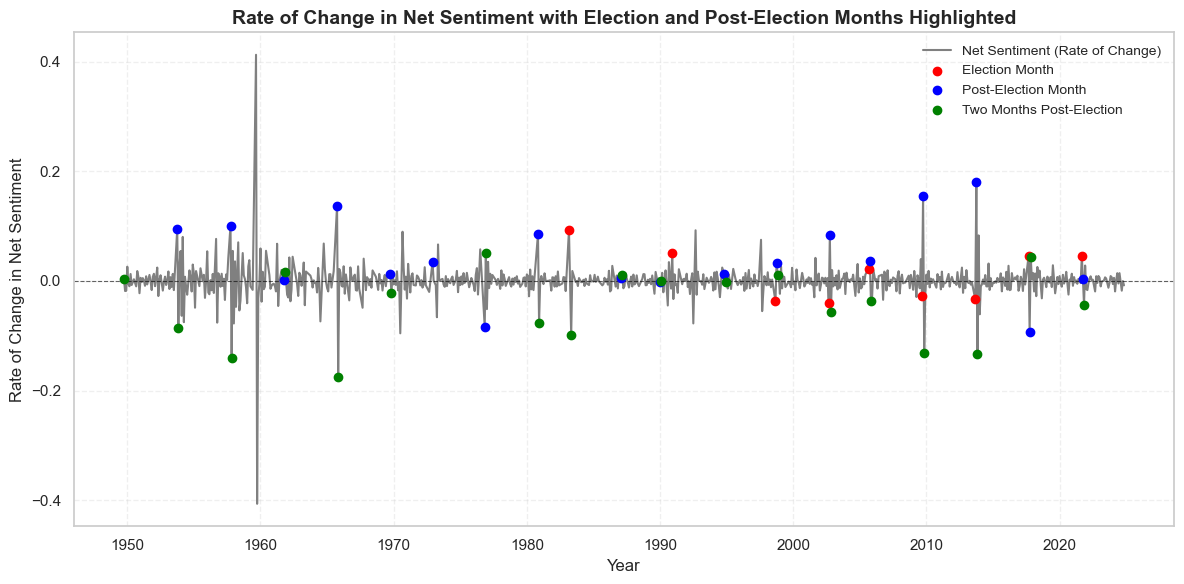

In [60]:
# Define election months (exact dates)
election_dates = {
    1949: 8, 1953: 9, 1957: 9, 1961: 9, 1965: 9,
    1969: 9, 1972: 11, 1976: 10, 1980: 10, 1983: 3,
    1987: 1, 1990: 12, 1994: 10, 1998: 9, 2002: 9,
    2005: 9, 2009: 9, 2013: 9, 2017: 9, 2021: 9
}

# Create a flag for election months
sentiment_by_month['is_election_month'] = sentiment_by_month.apply(
    lambda row: row['month_year'].year in election_dates and row['month_year'].month == election_dates[row['month_year'].year],
    axis=1
)

# Create a flag for the month after elections
sentiment_by_month['is_post_election_month'] = sentiment_by_month.apply(
    lambda row: row['month_year'].year in election_dates and row['month_year'].month == ((election_dates[row['month_year'].year] % 12) + 1),
    axis=1
)

# Create a flag for the month after elections
sentiment_by_month['is_2_month_post_election'] = sentiment_by_month.apply(
    lambda row: row['month_year'].year in election_dates and row['month_year'].month == ((election_dates[row['month_year'].year] % 12) + 2),
    axis=1
)


# Analyze positive derivatives in election months
election_months = sentiment_by_month[sentiment_by_month['is_election_month']]
positive_election_derivatives = election_months[election_months['sentiment_score_2_derivative_not_smoothed'] > 0]
proportion_positive_election = len(positive_election_derivatives) / len(election_months)

# Analyze positive derivatives in post-election months
post_election_months = sentiment_by_month[sentiment_by_month['is_post_election_month']]
positive_post_election_derivatives = post_election_months[post_election_months['sentiment_score_2_derivative_not_smoothed'] > 0]
proportion_positive_post_election = len(positive_post_election_derivatives) / len(post_election_months)

# Analyze negative derivatives in two month post-election 
two_month_post_election = sentiment_by_month[sentiment_by_month['is_2_month_post_election']]
negative_2_post_election_derivatives = two_month_post_election[two_month_post_election['sentiment_score_2_derivative_not_smoothed'] < 0]
proportion_negative_2_month_post_election = len(negative_2_post_election_derivatives) / len(two_month_post_election)

# Display results
print(f"Proportion of positive derivatives in election months: {proportion_positive_election:.2f}")
print(f"Proportion of positive derivatives in post-election months: {proportion_positive_post_election:.2f}")
print(f"Proportion of negative derivatives in two month post-election months: {proportion_negative_2_month_post_election:.2f}")

# Plot sentiment derivatives with election and post-election months highlighted
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_derivative_not_smoothed'],
         label='Net Sentiment (Rate of Change)', color='gray', linewidth=1.5)

# Highlight election months
plt.scatter(election_months['month_year'], election_months['sentiment_score_2_derivative_not_smoothed'],
            color='red', label='Election Month', zorder=5)

# Highlight post-election months
plt.scatter(post_election_months['month_year'], post_election_months['sentiment_score_2_derivative_not_smoothed'],
            color='blue', label='Post-Election Month', zorder=5)

# Highlight 2 post-election months
plt.scatter(two_month_post_election['month_year'], two_month_post_election['sentiment_score_2_derivative_not_smoothed'],
            color='green', label='Two Months Post-Election', zorder=5)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Net Sentiment', fontsize=12)
plt.title('Rate of Change in Net Sentiment with Election and Post-Election Months Highlighted',
          fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_score_2_election_post_election_months.png', dpi=300)
plt.show()

## 3.2 Sentiment per faction by time

In [26]:
# calculate average, median and standard deviation of negativity score per faction
sentiment_by_party_electoral_term = speeches_with_sentiment.groupby(['faction', 'electoral_term']).agg({'sentiment_score_1': ['mean', 'median', 'std'], 'sentiment_score_2': ['mean', 'median', 'std']}).reset_index()
sentiment_by_party_electoral_term

faction electoral_term sentiment_score_1            \
                                                       mean    median   
0                      AfD             19          0.134726  0.128117   
1                      AfD             20          0.139620  0.132893   
2                       BP              1          0.105414  0.106197   
3                      BSW             20          0.158725  0.159108   
4    Bündnis 90/Die Grünen             10          0.114328  0.110496   
..                     ...            ...               ...       ...   
113                    SPD             19          0.108690  0.096676   
114                    SPD             20          0.106330  0.096525   
115                    SSW              1          0.092380  0.086556   
116                    WAV              1          0.128414  0.124925   
117                      Z              1          0.109995  0.109257   

              sentiment_score_2                      
          std              mean    median       std  
0    0.113722          0.074803  0.054823  0.158165  
1    0.131478          0.066520  0.044776  0.155542  
2    0.060228          0.049723  0.051355  0.074853  
3    0.100920          0.070185  0.042145  0.173797  
4    0.121676          0.049519  0.040000  0.161696  
..        ...               ...       ...       ...  
113  0.121860          0.116809  0.100457  0.167048  
114  0.110992          0.125126  0.105932  0.168556  
115  0.070406          0.069825  0.047835  0.115601  
116  0.088275          0.032946  0.027650  0.069130  
117  0.072553          0.050405  0.055556  0.070689  

[118 rows x 8 columns]

In [27]:
# calculate average, median and standard deviation of negativity score per faction
sentiment_by_party = speeches_with_sentiment.groupby(['faction']).agg({'sentiment_score_1': ['mean', 'median', 'std'], 'sentiment_score_2': ['mean', 'median', 'std']}).reset_index()
sentiment_by_party

faction sentiment_score_1                      \
                                       mean    median       std   
0                     AfD          0.137011  0.130187  0.122351   
1                      BP          0.105414  0.106197  0.060228   
2                     BSW          0.158725  0.159108  0.100920   
3   Bündnis 90/Die Grünen          0.115889  0.110891  0.113497   
4                 CDU/CSU          0.099842  0.089794  0.117734   
5                      DA          0.087238  0.099577  0.073748   
6              DIE LINKE.          0.127849  0.124883  0.098236   
7                      DP          0.105767  0.104020  0.080160   
8                  DP/FVP          0.101294  0.075795  0.115648   
9                     DRP          0.094909  0.102270  0.074656   
10                    FDP          0.102744  0.096843  0.107656   
11                     FU          0.113199  0.116051  0.056143   
12                    FVP          0.085081  0.091931  0.058810   
13           Fraktionslos          0.120067  0.114801  0.106975   
14                 GB/BHE          0.108660  0.105162  0.077652   
15                   Gast          0.116385  0.108468  0.095166   
16                    KPD          0.125522  0.111020  0.135567   
17                     NR          0.147867  0.144854  0.084785   
18                    PDS          0.130600  0.125571  0.109875   
19                    SPD          0.100988  0.092427  0.115672   
20                    SSW          0.092380  0.086556  0.070406   
21                    WAV          0.128414  0.124925  0.088275   
22                      Z          0.109995  0.109257  0.072553   

   sentiment_score_2                      
                mean    median       std  
0           0.070936  0.050378  0.156991  
1           0.049723  0.051355  0.074853  
2           0.070185  0.042145  0.173797  
3           0.085640  0.064748  0.178082  
4           0.083548  0.072289  0.194299  
5           0.040163  0.048200  0.261362  
6           0.073145  0.052632  0.150064  
7           0.056373  0.059113  0.157478  
8           0.036395  0.056980  0.205294  
9           0.044647  0.029001  0.093647  
10          0.082511  0.074074  0.194876  
11          0.047711  0.046332  0.080317  
12          0.045392  0.070598  0.234139  
13          0.075008  0.052632  0.161725  
14          0.051950  0.056236  0.136425  
15          0.060892  0.049176  0.076989  
16          0.042700  0.040909  0.121652  
17          0.044138  0.049433  0.092569  
18          0.065909  0.047619  0.160619  
19          0.081296  0.068966  0.190143  
20          0.069825  0.047835  0.115601  
21          0.032946  0.027650  0.069130  
22          0.050405  0.055556  0.070689

In [28]:
# Check data types of the columns
print(speeches_with_sentiment.dtypes)

# Check for non-numeric entries in sentiment scores
print(speeches_with_sentiment['sentiment_score_1'].apply(type).value_counts())
print(speeches_with_sentiment['sentiment_score_2'].apply(type).value_counts())


id                                       int64
electoral_term                           int32
session                                  int32
first_name                              object
document_url                            object
last_name                               object
faction_id                               int64
position_short                          object
position_long                           object
politician_id                            int64
top_item                                object
top_title                               object
speech_content                          object
date                            datetime64[ns]
faction                                 object
year                                     int64
speech_length                            int64
age                                    float64
gender                                  object
tenure                                 float64
topic                                   object
main_category

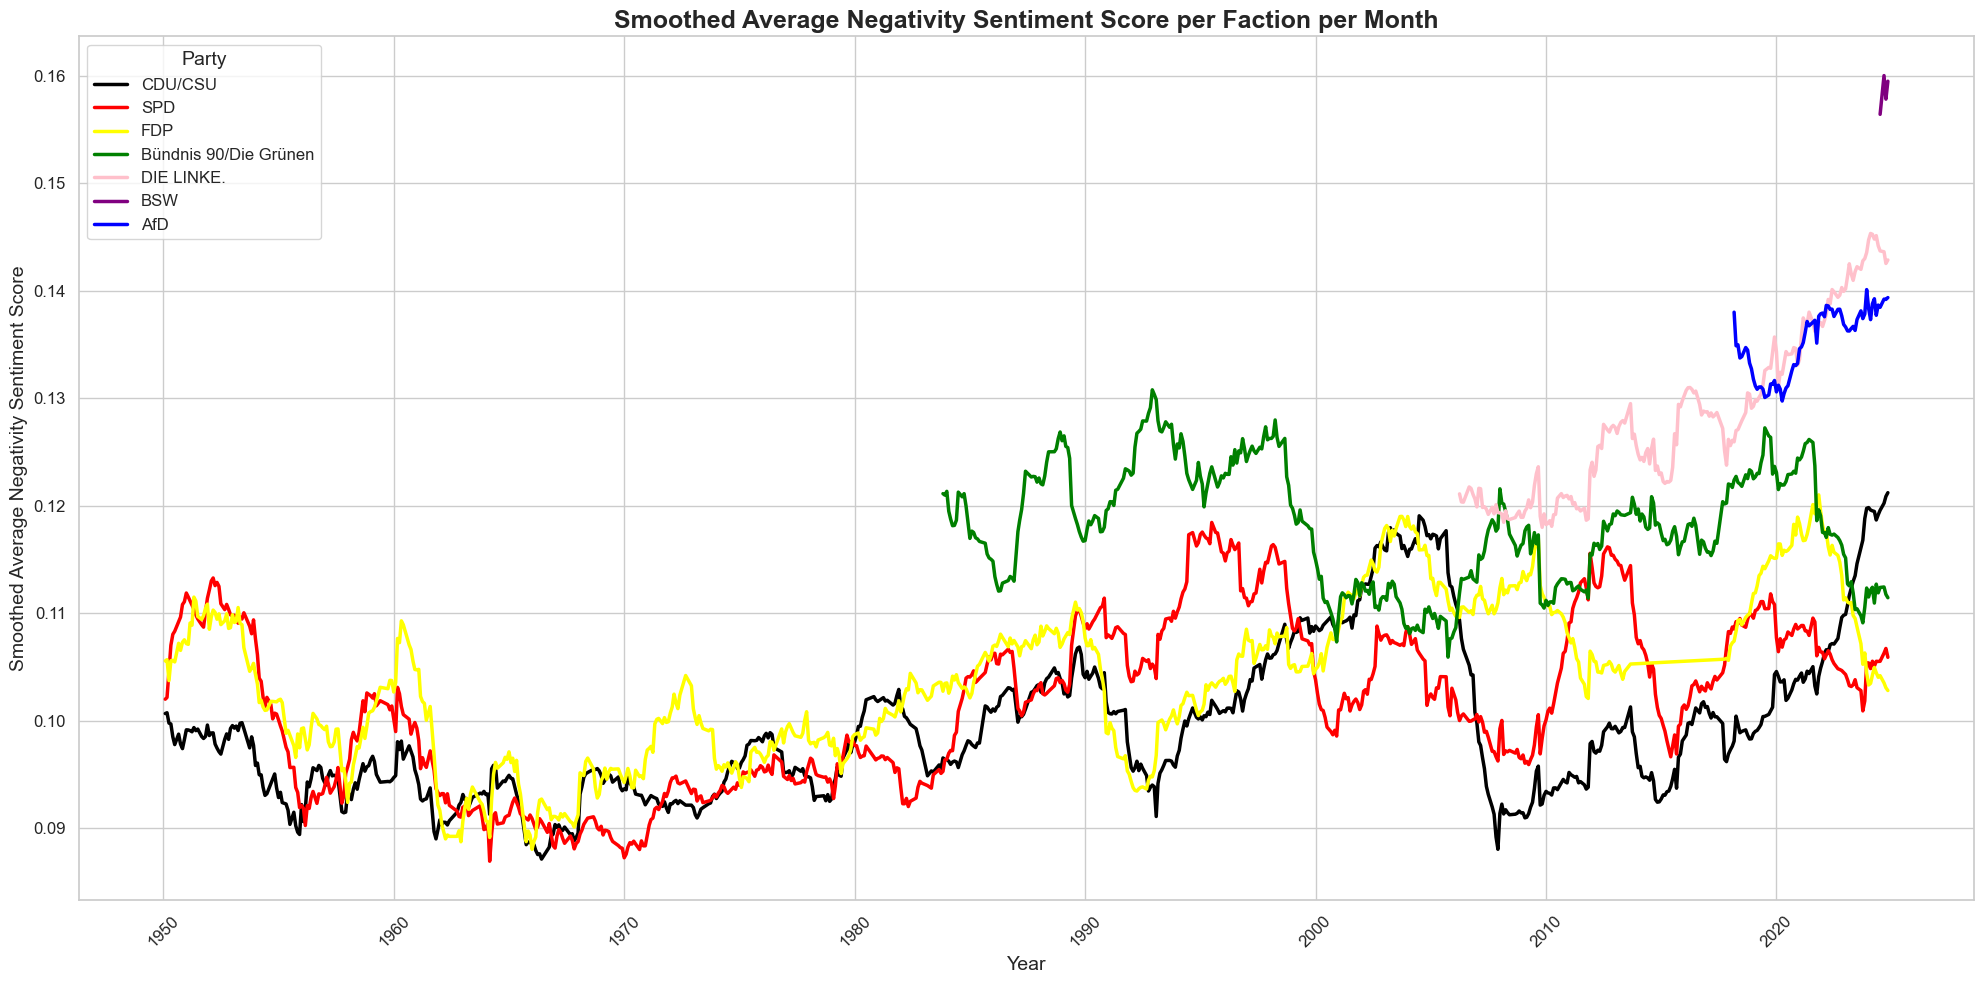

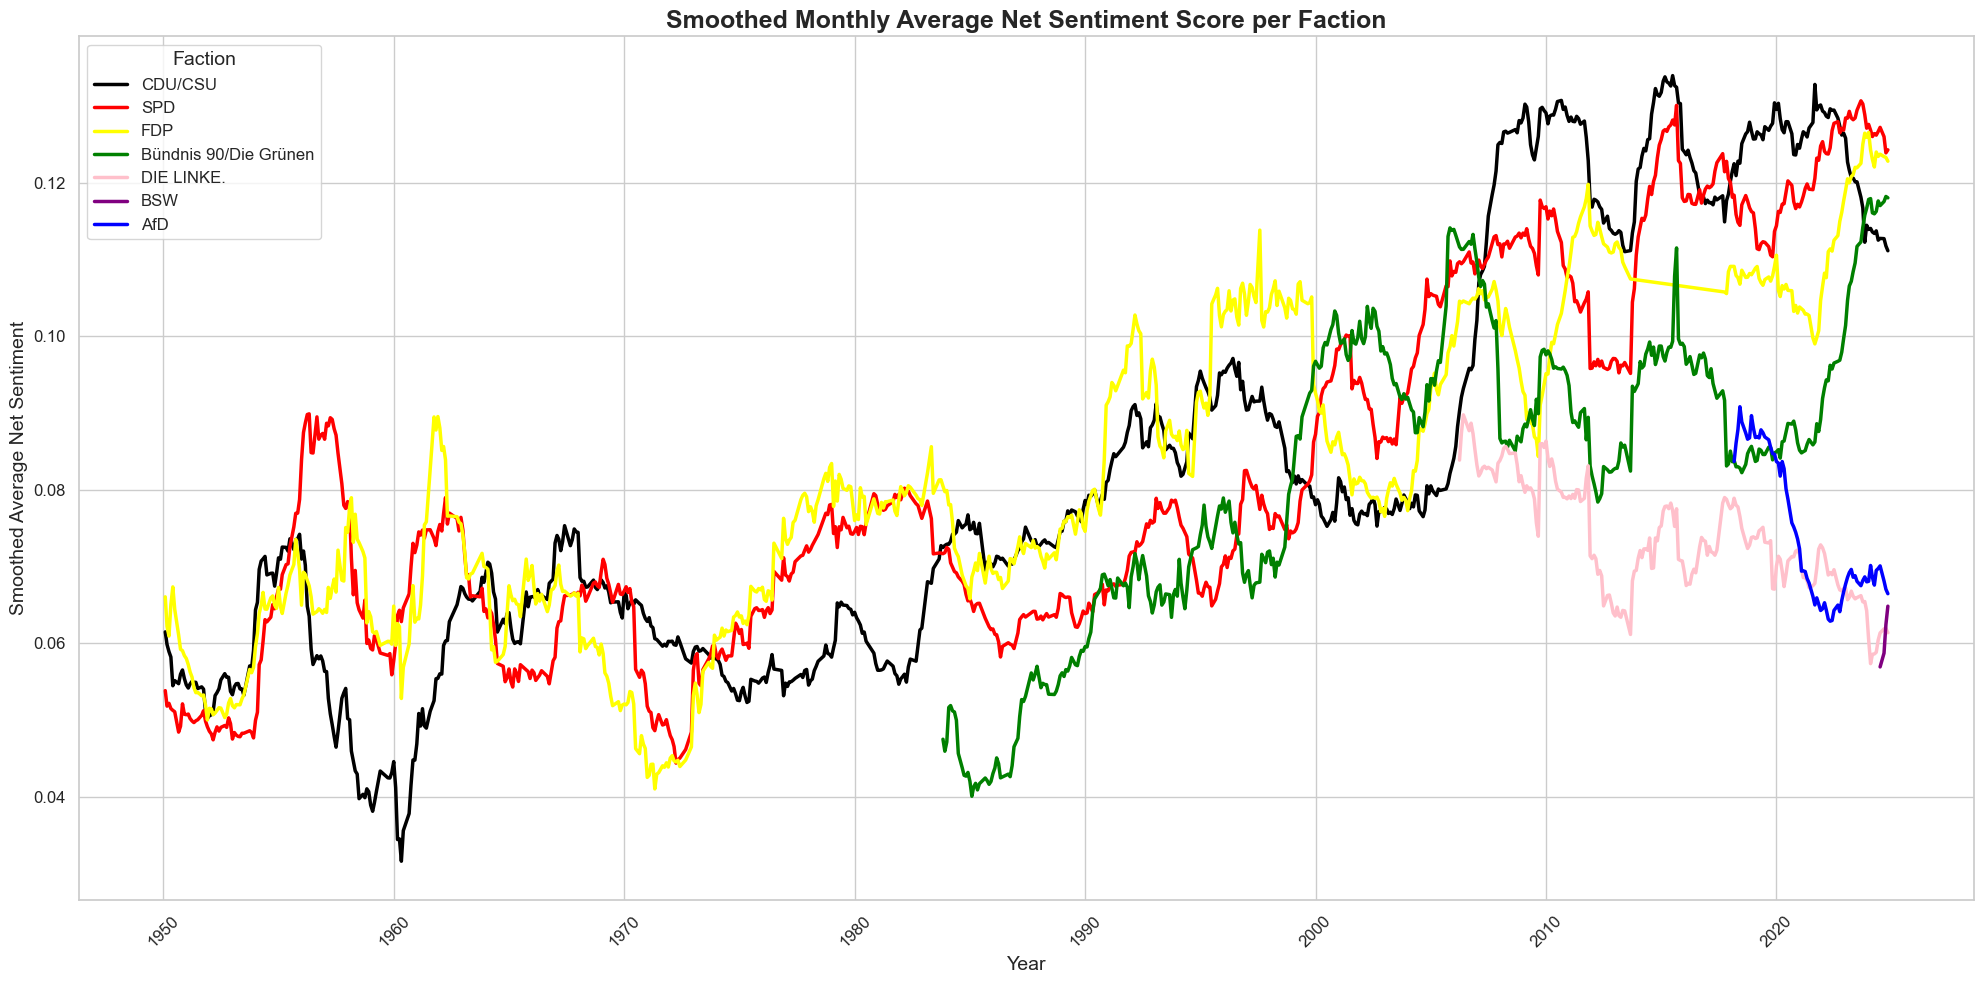

In [29]:
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'pink',
    'BSW':'purple',
    'AfD': 'blue'
}

# Step 2: Ensure 'sentiment_score_1' and 'sentiment_score_2' are numeric, converting any non-numeric entries to NaN
speeches_with_sentiment['sentiment_score_1'] = pd.to_numeric(speeches_with_sentiment['sentiment_score_1'], errors='coerce')
speeches_with_sentiment['sentiment_score_2'] = pd.to_numeric(speeches_with_sentiment['sentiment_score_2'], errors='coerce')
speeches_with_sentiment['sentiment_score_2_negativity'] = pd.to_numeric(speeches_with_sentiment['sentiment_score_2_negativity'], errors='coerce')


# Step 3: Group by 'faction' and 'month' to calculate the average for each sentiment score
sentiment_scores_per_party_per_month = speeches_with_sentiment.groupby(['faction', 'month_year'])[['sentiment_score_1', 'sentiment_score_2', 'sentiment_score_2_negativity']].mean().reset_index()

# Step 4: Convert 'month' back to datetime for plotting
sentiment_scores_per_party_per_month['month_year'] = sentiment_scores_per_party_per_month['month_year'].dt.to_timestamp()

# Step 5: Apply smoothing with a rolling average for each sentiment score
window_size = 24  # Adjust this for smoother or more responsive curves
smoothed_data = (
    sentiment_scores_per_party_per_month
    .set_index(['faction', 'month_year'])
    .groupby(level=0)[['sentiment_score_1', 'sentiment_score_2', 'sentiment_score_2_negativity']]
    .apply(lambda x: x.rolling(window=window_size, min_periods=6).mean())  # Rolling average with specified window
    .reset_index()
)

# Step 6: Plot for sentiment_score_1
plt.figure(figsize=(20, 10))
for faction, color in color_map.items():
    faction_data = smoothed_data[smoothed_data['faction'] == faction]
    sns.lineplot(
        data=faction_data,
        x='month_year',
        y='sentiment_score_1',
        label=faction,
        color=color,
        linewidth=2.5  # Increase line thickness
    )

plt.title('Smoothed Average Negativity Sentiment Score per Faction per Month', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Smoothed Average Negativity Sentiment Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Party', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_score_1_smoothed.png', dpi=300)
plt.show()

# Plot for sentiment_score_2 with thicker lines and increased font size
plt.figure(figsize=(20, 10))
for faction, color in color_map.items():
    faction_data = smoothed_data[smoothed_data['faction'] == faction]
    sns.lineplot(
        data=faction_data,
        x='month_year',
        y='sentiment_score_2',
        label=faction,
        color=color,
        linewidth=2.5  # Increase line thickness
    )

plt.title('Smoothed Monthly Average Net Sentiment Score per Faction', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Smoothed Average Net Sentiment', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_score_2_smoothed.png', dpi=300)

plt.show()

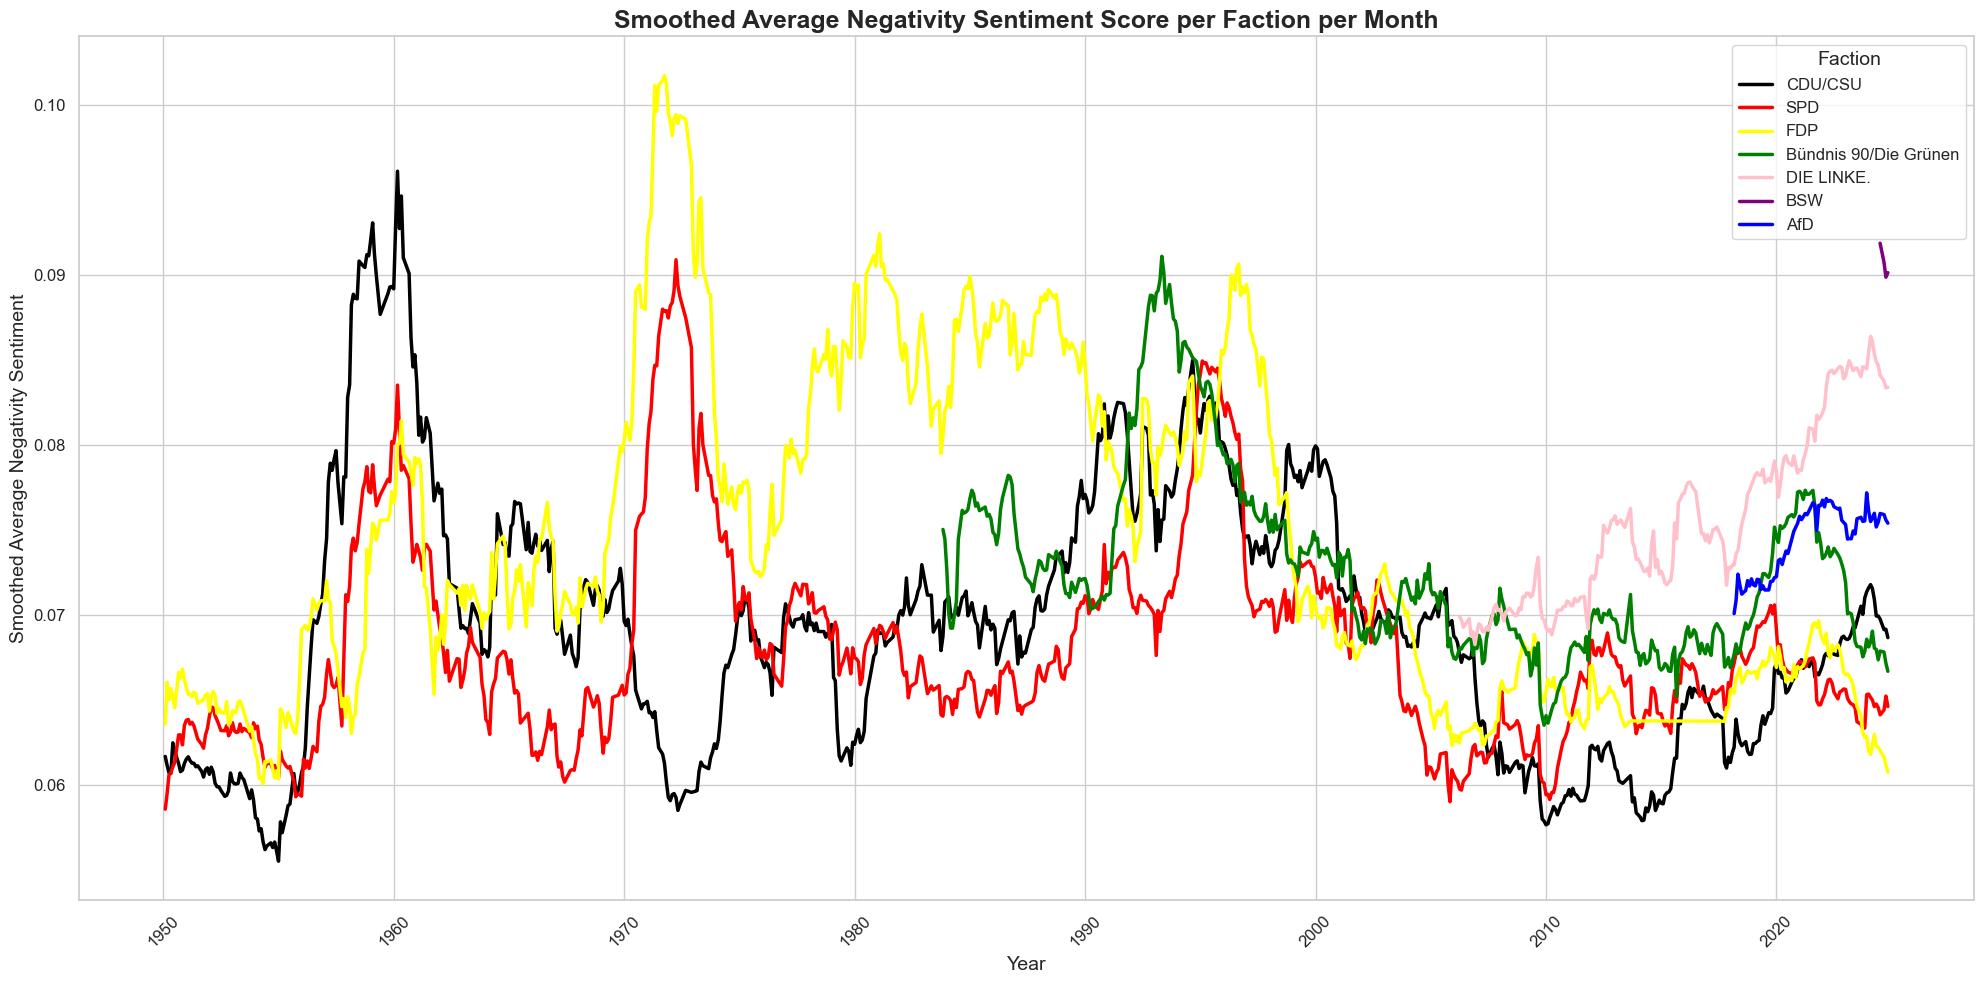

In [30]:
# Plot for sentiment_score_2 with thicker lines and increased font size
plt.figure(figsize=(20, 10))
for faction, color in color_map.items():
    faction_data = smoothed_data[smoothed_data['faction'] == faction]
    sns.lineplot(
        data=faction_data,
        x='month_year',
        y='sentiment_score_2_negativity',
        label=faction,
        color=color,
        linewidth=2.5  # Increase line thickness
    )

plt.title('Smoothed Average Negativity Sentiment Score per Faction per Month', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Smoothed Average Negativity Sentiment', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.savefig('sentiment_score_2_negativity_smoothed.png', dpi=300)

plt.show()

## 3.3 Sentiments of governing factions vs. oposition

In [31]:
# Define governing parties for each electoral term
regierung_mapping = {
    1: ['CDU/CSU', 'FDP', 'DP'],
    2: ['CDU/CSU', 'FDP', 'GB/BHE'],
    3: ['CDU/CSU'],
    4: ['CDU/CSU', 'FDP'],
    5: ['CDU/CSU', 'FDP'],
    6: ['SPD', 'FDP'],
    7: ['SPD', 'FDP'],
    8: ['SPD', 'FDP'],
    9: ['SPD', 'FDP'],
    10: ['CDU/CSU', 'FDP'],
    11: ['CDU/CSU', 'FDP'],
    12: ['CDU/CSU', 'FDP'],
    13: ['CDU/CSU', 'FDP'],
    14: ['SPD', 'Bündnis 90/Die Grünen'],
    15: ['SPD', 'Bündnis 90/Die Grünen'],
    16: ['CDU/CSU', 'SPD'],
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Function to label each faction as Governing or Opposition based on electoral term
def label_governing_opposition(row):
    term = row['electoral_term']
    if term in regierung_mapping:
        if row['faction'] in regierung_mapping[term]:
            return 'Governing'
        else:
            return 'Opposition'
    return np.nan  # For rows without a matching electoral term

# Apply the function to assign Governing or Opposition to each entry
speeches_with_sentiment['gov_opp'] = speeches_with_sentiment.apply(label_governing_opposition, axis=1)

# Group by 'electoral_term' and 'gov_opp' to calculate mean, median, and count for each sentiment score
gov_opp_summary = speeches_with_sentiment.groupby(['electoral_term', 'gov_opp']).agg(
    mean_score_1=('sentiment_score_1', 'mean'),
    median_score_1=('sentiment_score_1', 'median'),
    count_score_1=('sentiment_score_1', 'size'),
    mean_score_2=('sentiment_score_2', 'mean'),
    median_score_2=('sentiment_score_2', 'median'),
    count_score_2=('sentiment_score_2', 'size'),
    mean_score_2_positivity = ('sentiment_score_2_positivity', 'mean'),
    median_score_2_positivity = ('sentiment_score_2_positivity', 'median'),
    count_score_2_positivity = ('sentiment_score_2_positivity', 'size'),
    mean_score_2_negativity = ('sentiment_score_2_negativity', 'mean'),
    median_score_2_negativity = ('sentiment_score_2_negativity', 'median'),
    count_score_2_negativity = ('sentiment_score_2_negativity', 'size')
).reset_index()

# Display the result
print(gov_opp_summary)


    electoral_term     gov_opp  mean_score_1  median_score_1  count_score_1  \
0                1   Governing      0.103454        0.100346           6028   
1                1  Opposition      0.114342        0.107724           6216   
2                2   Governing      0.095961        0.092946           7246   
3                2  Opposition      0.097163        0.092546           6134   
4                3   Governing      0.096087        0.087528           5091   
5                3  Opposition      0.096961        0.091801           7990   
6                4   Governing      0.096051        0.078519          13441   
7                4  Opposition      0.093236        0.073264          11634   
8                5   Governing      0.094515        0.082074          18238   
9                5  Opposition      0.090587        0.070928          13804   
10               6   Governing      0.096035        0.085087           9794   
11               6  Opposition      0.091592        

In [32]:
# Map 'gov_opp' to binary values: 1 for Governing, 0 for Opposition
gov_opp_summary['gov_opp_binary'] = gov_opp_summary['gov_opp'].map({'Governing': 1, 'Opposition': 0})

# Calculate correlation for sentiment_score_1
correlation_score_1 = gov_opp_summary['gov_opp_binary'].corr(gov_opp_summary['mean_score_1'])

# Calculate correlation for sentiment_score_2
correlation_score_2 = gov_opp_summary['gov_opp_binary'].corr(gov_opp_summary['mean_score_2'])

# Calculate correlation for mean_score_2_positivity
correlation_score_positivity = gov_opp_summary['gov_opp_binary'].corr(gov_opp_summary['mean_score_2_positivity'])

# Calculate correlation for mean_score_2_negativity
correlation_score_negativity = gov_opp_summary['gov_opp_binary'].corr(gov_opp_summary['mean_score_2_negativity'])



# Display the results
print("Correlation between governing status and mean sentiment score 1:", correlation_score_1)
print("Correlation between governing status and mean sentiment score 2:", correlation_score_2)

# Display the results
print("Correlation between governing status and mean positivity score:", correlation_score_positivity)
print("Correlation between governing status and mean negativity score:", correlation_score_negativity)


Correlation between governing status and mean sentiment score 1: -0.4153051475821364
Correlation between governing status and mean sentiment score 2: 0.26625757413230505
Correlation between governing status and mean positivity score: 0.3799742572540164
Correlation between governing status and mean negativity score: 0.31015724180284215


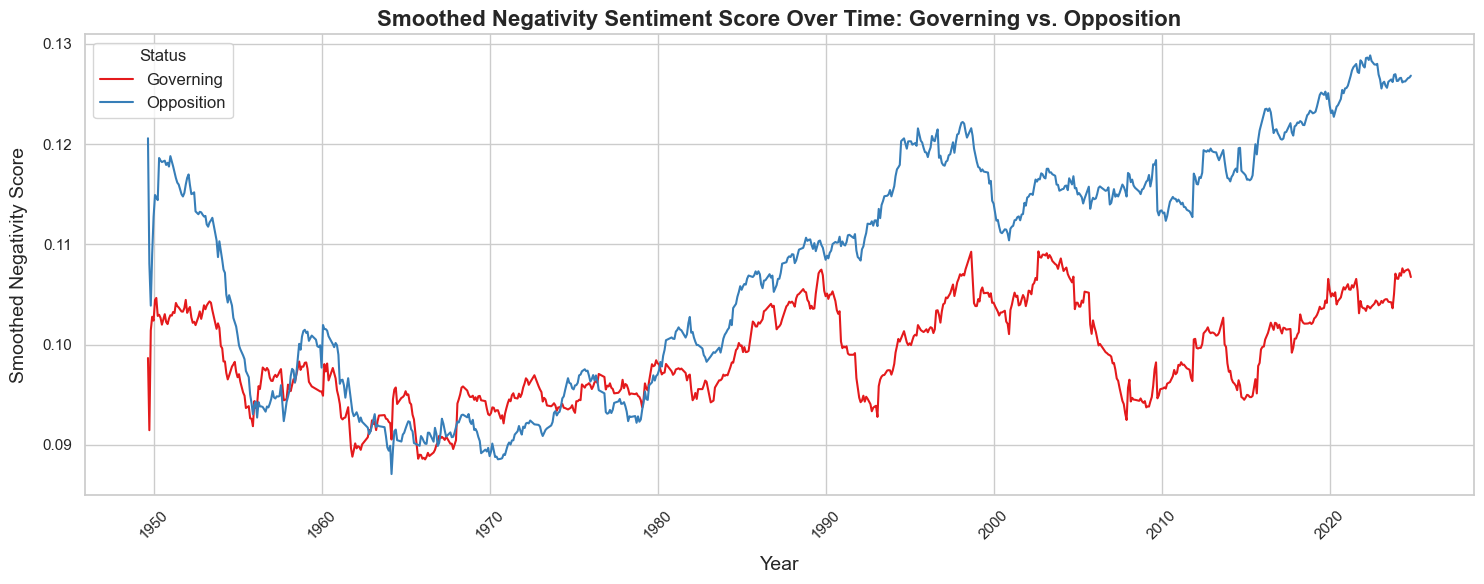

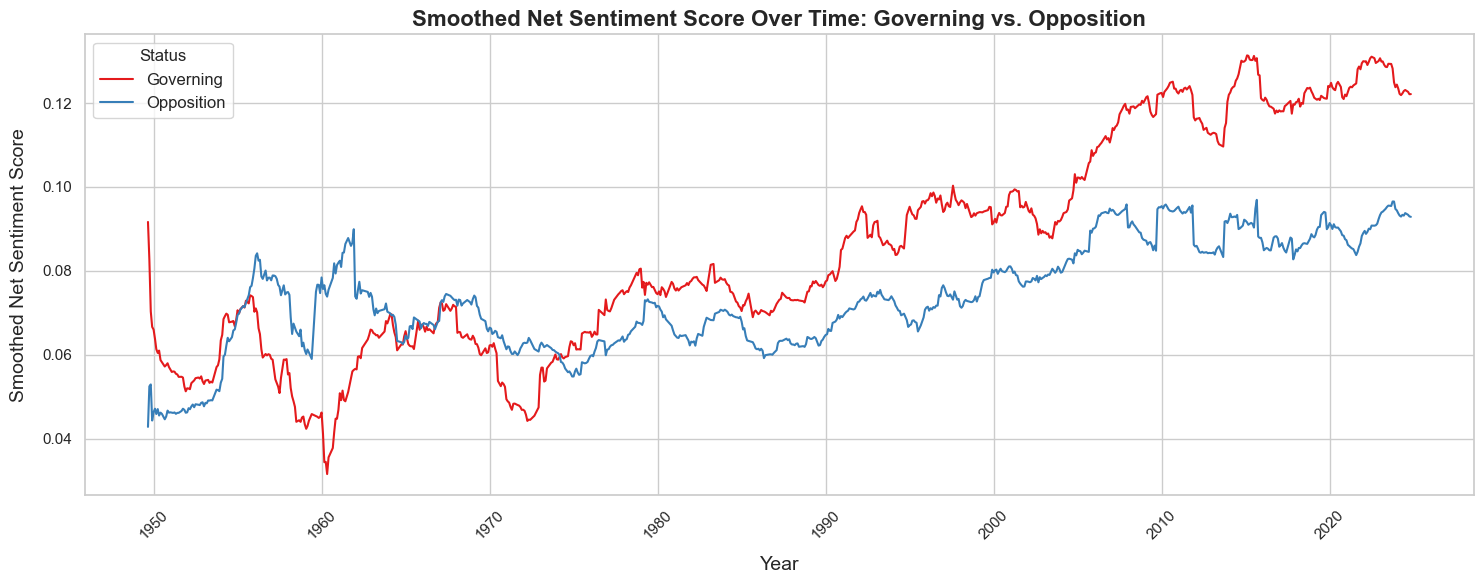

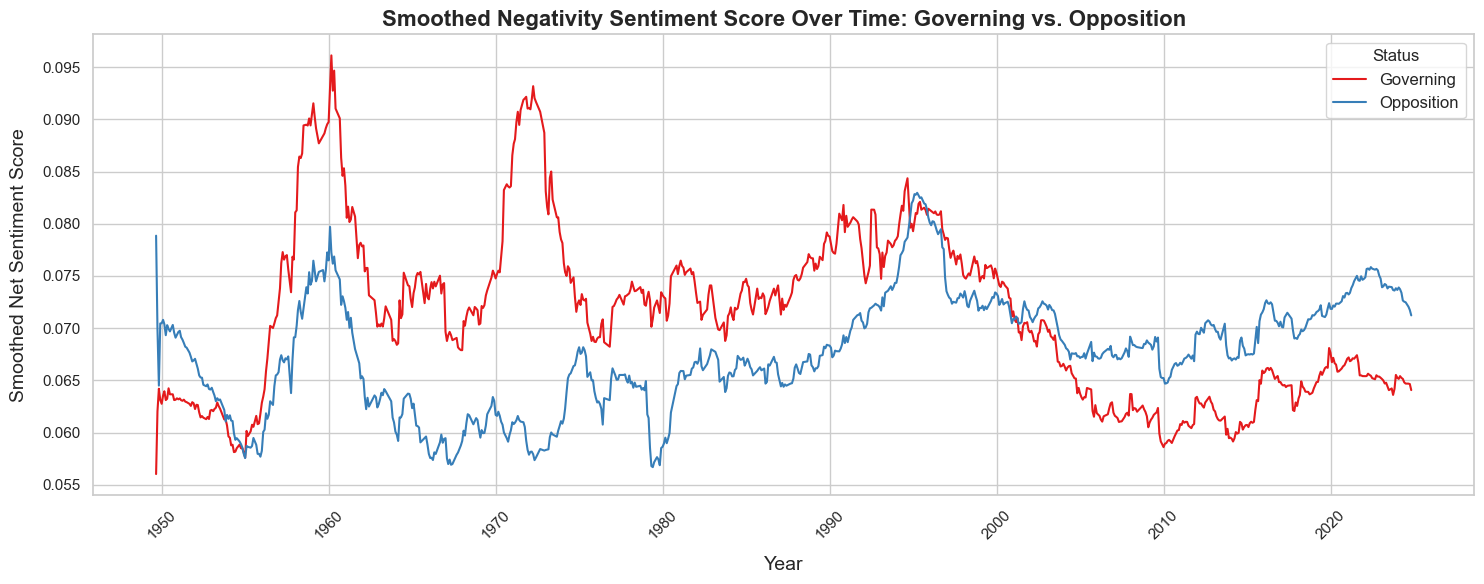

In [33]:
sns.set_theme(style="whitegrid")

# Group by 'month' and 'gov_opp' to calculate the mean for each sentiment score
monthly_sentiment = speeches_with_sentiment.groupby(['month_year', 'gov_opp'])[['sentiment_score_1', 'sentiment_score_2', 'sentiment_score_2_positivity', 'sentiment_score_2_negativity']].mean().reset_index()

# Convert 'month' back to datetime format for plotting
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].dt.to_timestamp()

# Calculate a 24-month rolling average for each group (Governing and Opposition) and each sentiment score
monthly_sentiment['rolling_avg_1'] = (
    monthly_sentiment.groupby('gov_opp')['sentiment_score_1']
    .transform(lambda x: x.rolling(window=24, min_periods=1).mean())
)
monthly_sentiment['rolling_avg_2'] = (
    monthly_sentiment.groupby('gov_opp')['sentiment_score_2']
    .transform(lambda x: x.rolling(window=24, min_periods=1).mean())
)

monthly_sentiment['rolling_avg_2_neagtivity'] = (
    monthly_sentiment.groupby('gov_opp')['sentiment_score_2_negativity']
    .transform(lambda x: x.rolling(window=24, min_periods=1).mean())
)



# Assuming 'monthly_sentiment' data is already processed as per your code snippet
# Set up the general aesthetics for the plots
sns.set(style="whitegrid")
sns.set_palette('Set1')
custom_palette = {
    'Governing': sns.color_palette("Set1")[0],  # Fourth color in 'Set1' palette
    'Opposition': sns.color_palette("Set1")[1]  # First color in 'Set1' palette
}

# Function to customize each plot similarly
def customize_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Status', title_fontsize=12, fontsize=12, loc='best', frameon=True)

# Plot for `sentiment_score_1` with 24-month rolling average
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(
    data=monthly_sentiment,
    x='month_year',
    y='rolling_avg_1',
    hue='gov_opp',
    linewidth=1.5,
    palette=custom_palette,
    ax=ax
)
customize_plot(
    ax,
    title='Smoothed Negativity Sentiment Score Over Time: Governing vs. Opposition',
    xlabel='Year',
    ylabel='Smoothed Negativity Score'
)
plt.tight_layout()
plt.savefig('sentiment_score_1_gov_opp.png', dpi=300)
plt.show()

# Plot for `sentiment_score_2` with 24-month rolling average
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(
    data=monthly_sentiment,
    x='month_year',
    y='rolling_avg_2',
    hue='gov_opp',
    linewidth=1.5,
    palette=custom_palette,
    ax=ax
)
customize_plot(
    ax,
    title='Smoothed Net Sentiment Score Over Time: Governing vs. Opposition',
    xlabel='Year',
    ylabel='Smoothed Net Sentiment Score'
)
plt.tight_layout()
plt.savefig('sentiment_score_2_gov_opp.png', dpi=300)
plt.show()

# Plot for `sentiment_score_2_negativity` with 24-month rolling average
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(
    data=monthly_sentiment,
    x='month_year',
    y='rolling_avg_2_neagtivity',
    hue='gov_opp',
    linewidth=1.5,
    palette=custom_palette,
    ax=ax
)
customize_plot(
    ax,
    title='Smoothed Negativity Sentiment Score Over Time: Governing vs. Opposition',
    xlabel='Year',
    ylabel='Smoothed Net Sentiment Score'
)
plt.tight_layout()
plt.savefig('sentiment_score_2_negativity_gov_opp.png', dpi=300)
plt.show()



## 3.4 Topics Sentiment

In [34]:
# only keep 20 electoral term 
speeches_with_sentiment_section = speeches_with_sentiment[(speeches_with_sentiment['electoral_term']==20)]
speeches_with_sentiment_topics = speeches_with_sentiment_section.copy()
speeches_with_sentiment_topics

id  electoral_term  session first_name  \
909753  1066957              20        1   gabriele   
909755  1066959              20        1   gabriele   
909757  1066961              20        1     stefan   
909759  1066963              20        1     britta   
909761  1066965              20        1      marco   
...         ...             ...      ...        ...   
969848  1094067              20      201     janine   
969850  1094069              20      201       tino   
969852  1094071              20      201     thomas   
969854  1094073              20      201   wilfried   
969856  1094075              20      201       dirk   

                                             document_url   last_name  \
909753  https://dip21.bundestag.de/dip21/btp/20/20001.pdf   katzmarek   
909755  https://dip21.bundestag.de/dip21/btp/20/20001.pdf   katzmarek   
909757  https://dip21.bundestag.de/dip21/btp/20/20001.pdf      müller   
909759  https://dip21.bundestag.de/dip21/btp/20/20001.pdf   haßelmann   
909761  https://dip21.bundestag.de/dip21/btp/20/20001.pdf   buschmann   
...                                                   ...         ...   
969848  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     wissler   
969850  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       sorge   
969852  https://dip21.bundestag.de/dip21/btp/20/20201.pdf       lutze   
969854  https://dip21.bundestag.de/dip21/btp/20/20201.pdf     oellers   
969856  https://dip21.bundestag.de/dip21/btp/20/20201.pdf  heidenblut   

        faction_id        position_short              position_long  \
909753          25  Member of Parliament                       None   
909755          25  Member of Parliament                       None   
909757           5  Member of Parliament                       None   
909759           4  Member of Parliament                       None   
909761          15              Minister  Bundesminister der Justiz   
...            ...                   ...                        ...   
969848           7  Member of Parliament                       None   
969850           5  Member of Parliament                       None   
969852           7  Member of Parliament                       None   
969854           5  Member of Parliament                       None   
969856          25  Member of Parliament                       None   

        politician_id  ...     tenure                            topic  \
909753       11004325  ...   7.706849                         No Topic   
909755       11004325  ...   7.706849  Binnenhandel: Verbraucherschutz   
909757       11003597  ...  18.983562             Recht & Kriminalität   
909759       11003764  ...  15.783562                           Arbeit   
909761       11004023  ...  11.750685             Recht & Kriminalität   
...               ...  ...        ...                              ...   
969848       11005260  ...   2.802740                         No Topic   
969850       11004409  ...  10.627397                         No Topic   
969852       11004103  ...  14.734247              Arbeit: Mindestlohn   
969854       11004365  ...  10.690411                    Sozialpolitik   
969856       11004295  ...  10.742466              Arbeit: Mindestlohn   

         main_category        sub_category sentiment_score_1  \
909753        no topic                None          0.000000   
909755  Domestic Trade   Verbraucherschutz          0.058314   
909757     Law & Crime                None          0.088672   
909759            Work                None          0.053138   
909761     Law & Crime                None          0.132334   
...                ...                 ...               ...   
969848        no topic                None          0.256111   
969850        no topic                None          0.103984   
969852            Work         Mindestlohn          0.132517   
969854   Social Policy                None          0.135320   
969856            Work       

### 3.4.1 Main Topic

In [35]:
category_counts = speeches_with_sentiment_topics['main_category'].value_counts()
valid_categories = category_counts[category_counts >= 500].index.tolist()
filtered_data = speeches_with_sentiment_topics[speeches_with_sentiment_topics['main_category'].isin(valid_categories) & 
                                                (speeches_with_sentiment_topics['main_category'] != 'no topic')]



# Aggregate data: mean, median, std for sentiment_score_1
sentiment_by_main_category = filtered_data.groupby('main_category').agg({
    'sentiment_score_1': ['mean', 'std'],
    'sentiment_score_2': ['mean', 'std'],
    'sentiment_score_2_negativity': ['mean', 'std'],
    'sentiment_score_2_positivity': ['mean', 'std']
}).reset_index()

# Flatten the multi-index columns
sentiment_by_main_category.columns = ['main_category', 
                                       'mean_score_1', 'std_score_1',
                                       'mean_score_2', 'std_score_2',
                                        'mean_score_2_negativity', 'std_score_2_negativity',
                                        'mean_score_2_positivity', 'std_score_2_positivity']


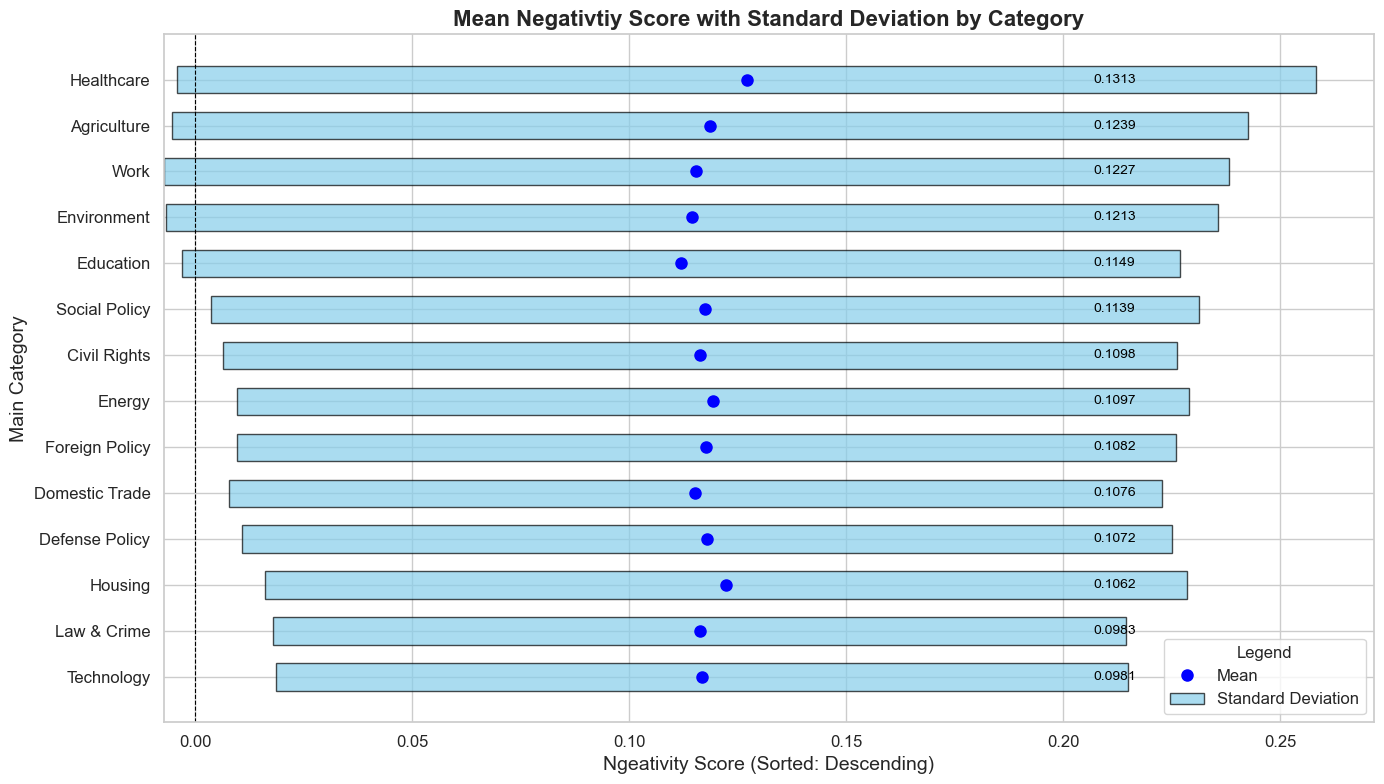

In [36]:
# Sort by mean_score_1 for better visualization
sentiment_by_main_category = sentiment_by_main_category.sort_values(by='std_score_1', ascending=True).reset_index(drop=True)

# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Define a consistent offset for standard deviation labels
label_offset = sentiment_by_main_category['mean_score_1'].max() + 0.08  # Set a fixed alignment for all labels

# Plot the bars showing mean and standard deviation as the range
for i, row in sentiment_by_main_category.iterrows():
    # Draw the full bar representing mean ± std
    plt.barh(row['main_category'], row['std_score_1'] * 2,  # Full range is 2 * std
             left=row['mean_score_1'] - row['std_score_1'],  # Start position
             height=0.6, color='skyblue', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker
    plt.plot(row['mean_score_1'], row['main_category'], 'o', color='blue', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value to the far right
    plt.text(label_offset, i, f"{row['std_score_1']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Mean Negativtiy Score with Standard Deviation by Category', fontsize=16, weight='bold')
plt.xlabel('Ngeativity Score (Sorted: Descending)', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

#save
plt.savefig('mean_sentiment_score_1_std_by_category.png', dpi=300)

# Show the plot
plt.show()


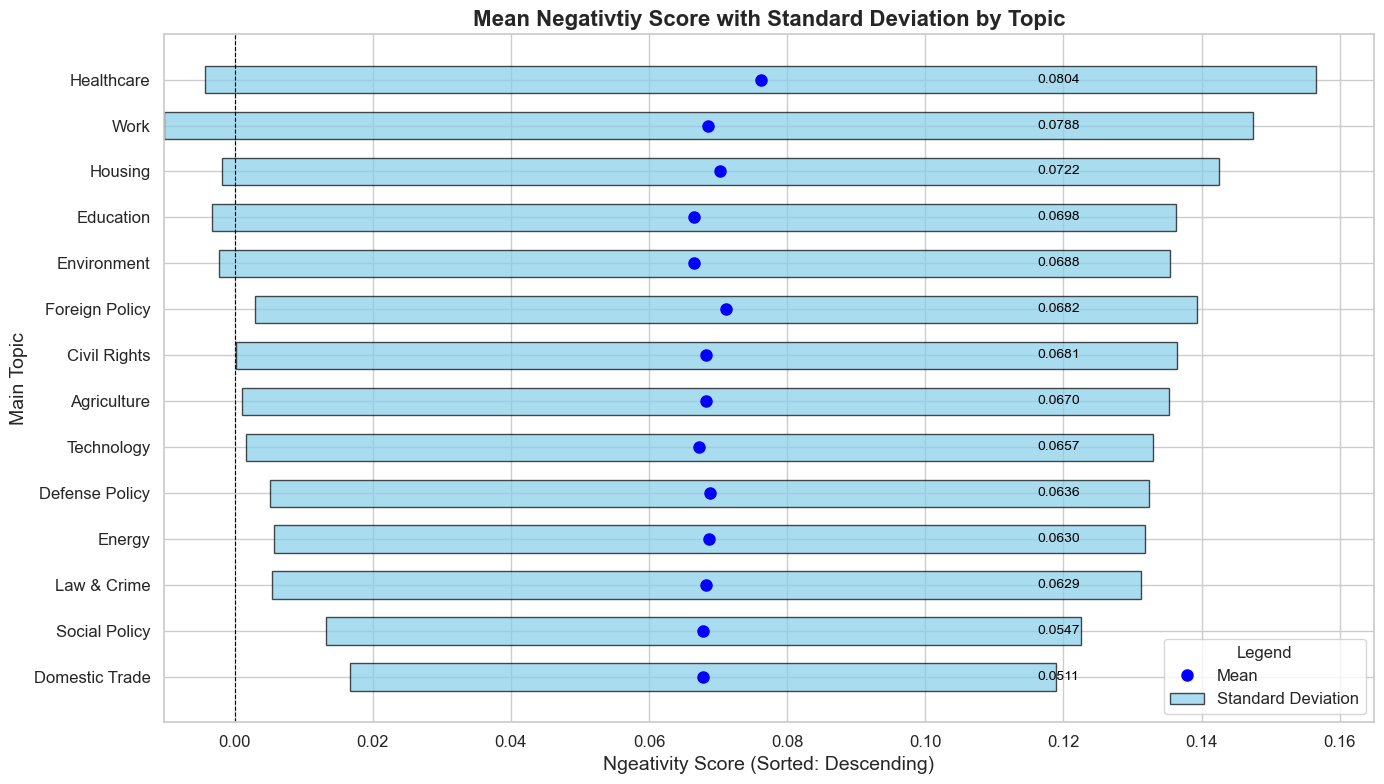

In [37]:
# Sort by mean_score_1 for better visualization
sentiment_by_main_category = sentiment_by_main_category.sort_values(by='std_score_2_negativity', ascending=True).reset_index(drop=True)

# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Define a consistent offset for standard deviation labels
label_offset = sentiment_by_main_category['mean_score_2_negativity'].max() + 0.04 # Set a fixed alignment for all labels

# Plot the bars showing mean and standard deviation as the range
for i, row in sentiment_by_main_category.iterrows():
    # Draw the full bar representing mean ± std
    plt.barh(row['main_category'], row['std_score_2_negativity'] * 2,  # Full range is 2 * std
             left=row['mean_score_2_negativity'] - row['std_score_2_negativity'],  # Start position
             height=0.6, color='skyblue', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker
    plt.plot(row['mean_score_2_negativity'], row['main_category'], 'o', color='blue', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value to the far right
    plt.text(label_offset, i, f"{row['std_score_2_negativity']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Mean Negativtiy Score with Standard Deviation by Topic', fontsize=16, weight='bold')
plt.xlabel('Ngeativity Score (Sorted: Descending)', fontsize=14)
plt.ylabel('Main Topic', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

#save
plt.savefig('mean_sentiment_score_2_negativity_std_by_category.png', dpi=300)

# Show the plot
plt.show()


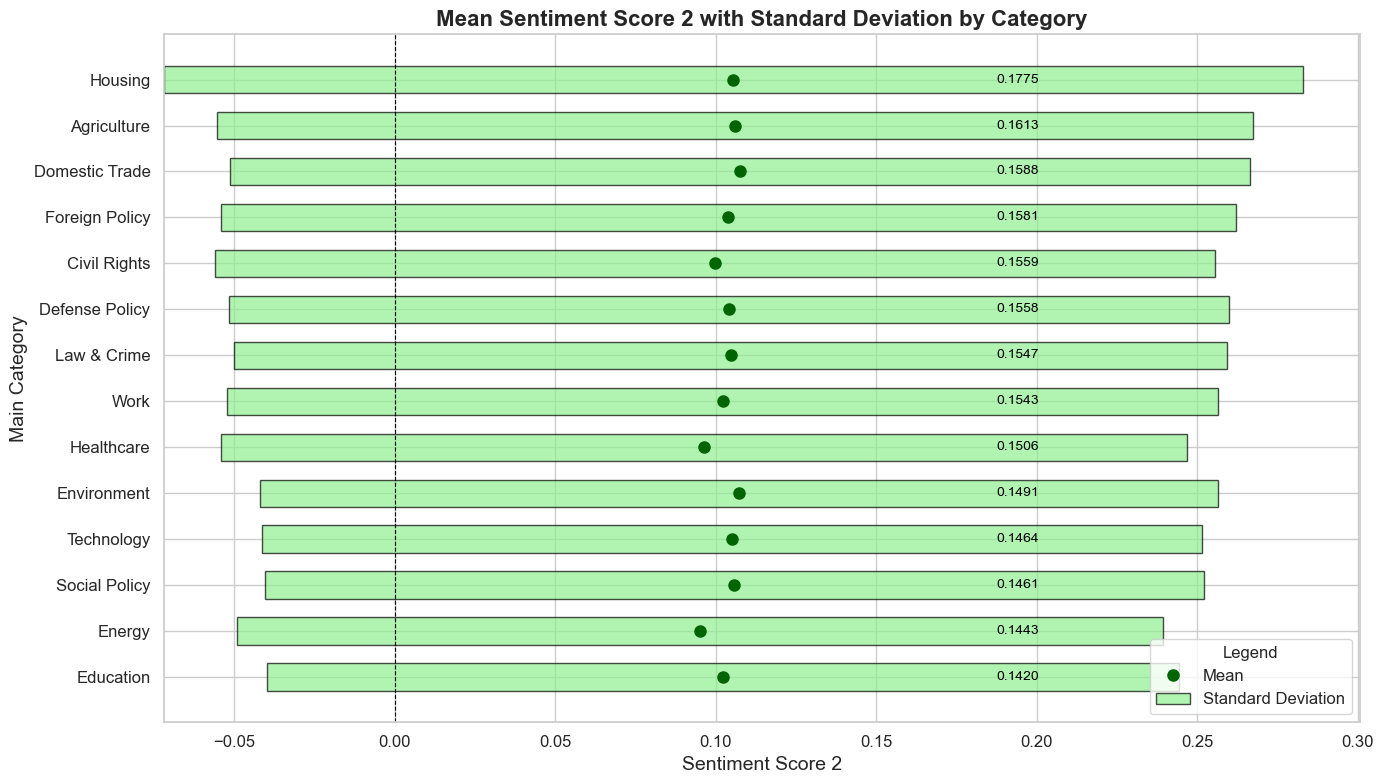

In [38]:
sentiment_by_main_category = sentiment_by_main_category.sort_values(by='std_score_2', ascending=True).reset_index(drop=True)


# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Define a consistent offset for standard deviation labels
label_offset = sentiment_by_main_category['mean_score_2'].max() + 0.08  # Set a fixed alignment for all labels

# Plot the bars showing mean and standard deviation as the range
for i, row in sentiment_by_main_category.iterrows():
    # Draw the full bar representing mean ± std
    plt.barh(row['main_category'], row['std_score_2'] * 2,  # Full range is 2 * std
             left=row['mean_score_2'] - row['std_score_2'],  # Start position
             height=0.6, color='lightgreen', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker
    plt.plot(row['mean_score_2'], row['main_category'], 'o', color='darkgreen', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value to the far right
    plt.text(label_offset, i, f"{row['std_score_2']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Mean Sentiment Score 2 with Standard Deviation by Category', fontsize=16, weight='bold')
plt.xlabel('Sentiment Score 2', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 3.4.2 Sub Topic

In [39]:
# show unnique sub categories
speeches_with_sentiment_topics['sub_category'].value_counts()

sub_category_counts = speeches_with_sentiment_topics['sub_category'].value_counts()
valid_sub_categories = sub_category_counts[sub_category_counts >= 200].index.tolist()
filtered_sub_data = speeches_with_sentiment_topics[speeches_with_sentiment_topics['sub_category'].isin(valid_sub_categories) & 
                                                (speeches_with_sentiment_topics['sub_category'] != 'No Topic')&
                                                (speeches_with_sentiment_topics['sub_category']!= ' Nachkriegsordnung')]

# Aggregate data: mean, median, std for sentiment_score_1
sentiment_by_sub_category = filtered_sub_data.groupby('sub_category').agg({
    'sentiment_score_1': ['mean', 'std', 'count'],
    'sentiment_score_2': ['mean', 'std', 'count']
}).reset_index()

# Flatten the multi-index columns
sentiment_by_sub_category.columns = ['sub_category', 
                                       'mean_score_1', 'std_score_1','count_score_1',
                                       'mean_score_2', 'std_score_2', 'count_score_2']

# Sort by mean_score_1 for better visualization
sentiment_by_sub_category = sentiment_by_sub_category.sort_values(by='std_score_1', ascending=True)

sentiment_by_sub_category

sub_category  mean_score_1  std_score_1  count_score_1  \
8                    Mittelstand      0.113133     0.069755            376   
9                 Nahrungsmittel      0.111611     0.075129            251   
6     Innerdeutscher Terrorismus      0.118108     0.087516            413   
5                Geringverdiener      0.127537     0.097715            385   
1                Digitalisierung      0.114999     0.099596            802   
4                Fossile Energie      0.123260     0.115006            501   
7                    Mindestlohn      0.115983     0.121193            470   
2            Entwicklungspolitik      0.117420     0.125044            350   
3    Flucht, Asyl & Einbürgerung      0.118653     0.127370            266   
0                        Covid19      0.131365     0.128670            433   
10             Verbraucherschutz      0.117993     0.154459            241   

    mean_score_2  std_score_2  count_score_2  
8       0.095925     0.130374            376  
9       0.102341     0.128021            251  
6       0.092490     0.133049            413  
5       0.103463     0.145381            385  
1       0.105957     0.145213            802  
4       0.094181     0.143874            501  
7       0.101547     0.163876            470  
2       0.101743     0.150534            350  
3       0.088965     0.130413            266  
0       0.098594     0.154293            433  
10      0.105855     0.169109            241

<Figure size 1400x1000 with 0 Axes>

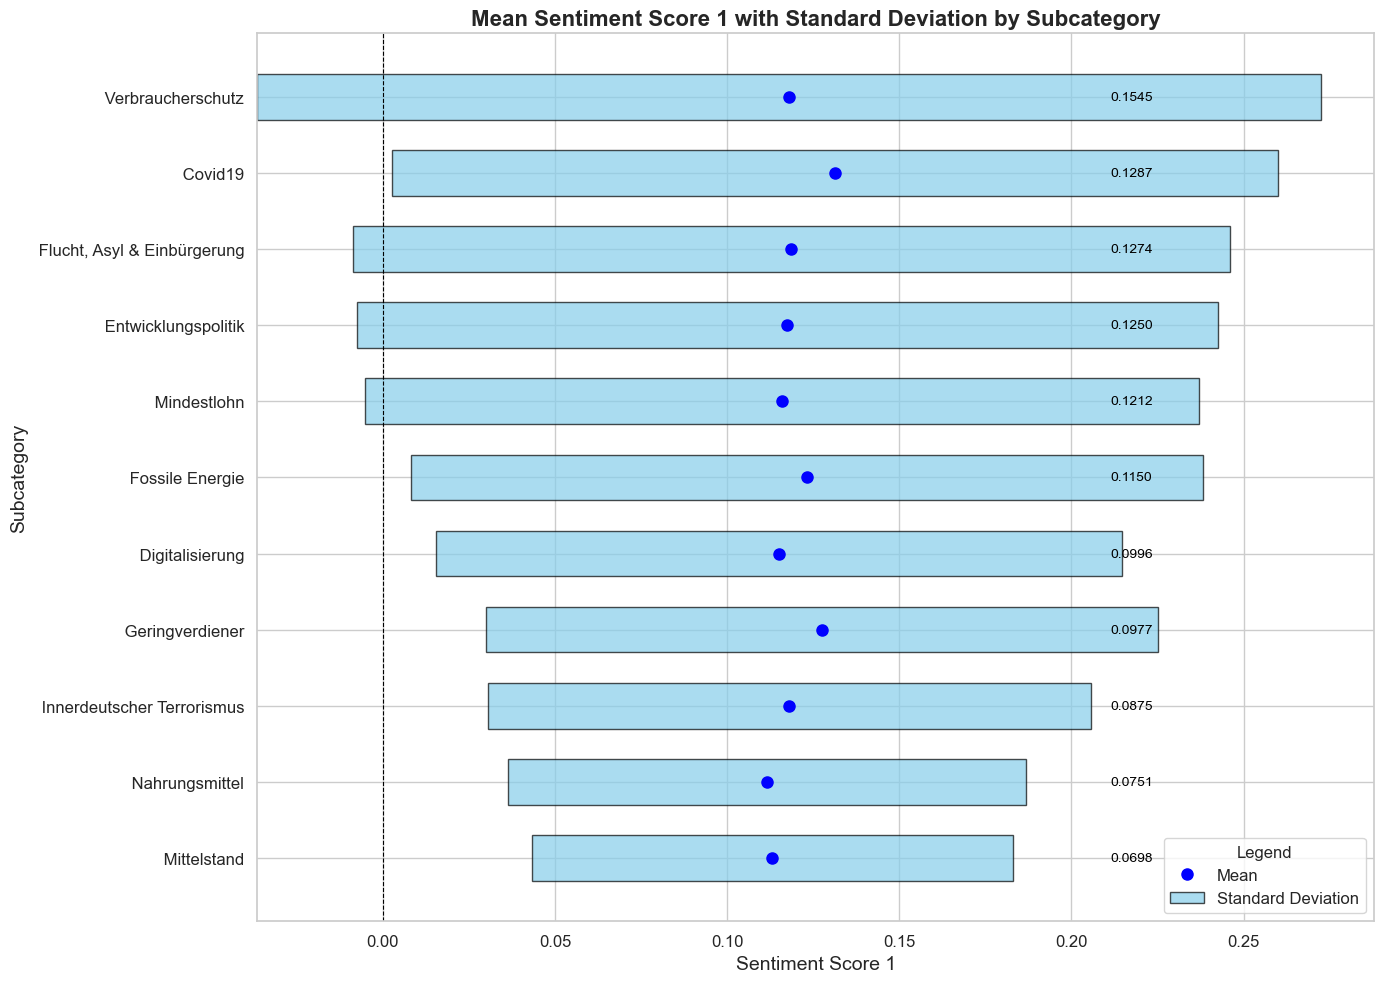

In [40]:
# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 10))

# Define a consistent offset for standard deviation labels for both Sentiment Score 1 and Score 2
label_offset_1 = sentiment_by_sub_category['mean_score_1'].max() + 0.08  # For Score 1
label_offset_2 = sentiment_by_sub_category['mean_score_2'].max() + 0.08  # For Score 2

# --- Plot for Sentiment Score 1 ---

sentiment_by_sub_category = sentiment_by_sub_category.sort_values(by='std_score_1', ascending=True).reset_index(drop=True)

plt.figure(figsize=(14, 10))
for i, row in sentiment_by_sub_category.iterrows():
    # Draw the full bar representing mean ± std for sentiment_score_1
    plt.barh(row['sub_category'], row['std_score_1'] * 2,  # Full range is 2 * std
             left=row['mean_score_1'] - row['std_score_1'],  # Start position
             height=0.6, color='skyblue', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker for sentiment_score_1
    plt.plot(row['mean_score_1'], row['sub_category'], 'o', color='blue', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value for sentiment_score_1
    plt.text(label_offset_1, i, f"{row['std_score_1']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot for Sentiment Score 1
plt.title('Mean Sentiment Score 1 with Standard Deviation by Subcategory', fontsize=16, weight='bold')
plt.xlabel('Sentiment Score 1', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot for Sentiment Score 1
plt.show()


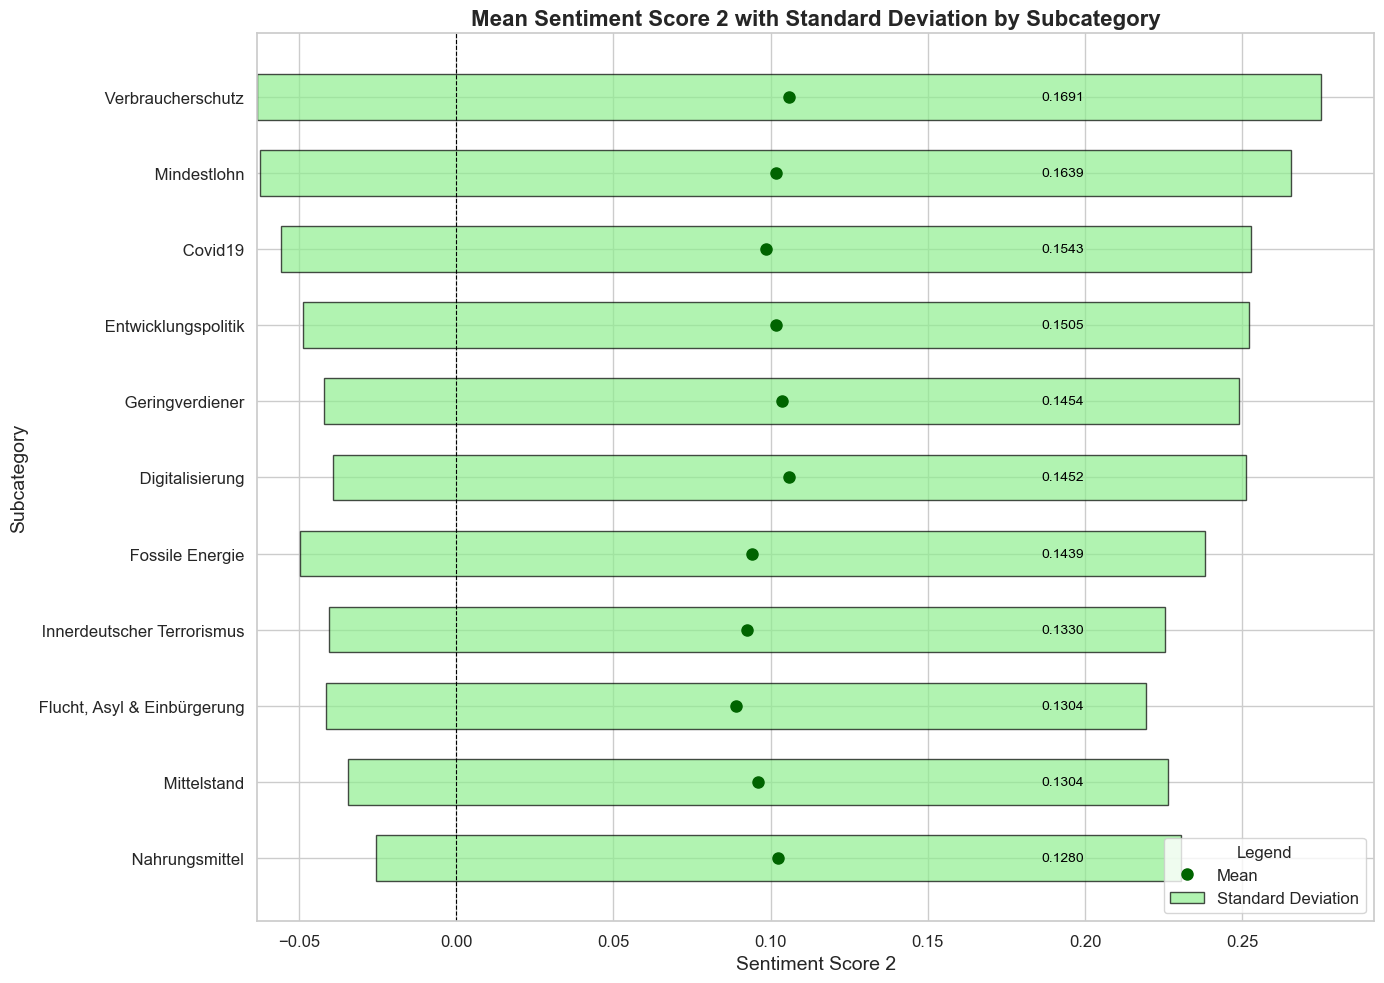

In [41]:
sentiment_by_sub_category = sentiment_by_sub_category.sort_values(by='std_score_2', ascending=True).reset_index(drop=True)


plt.figure(figsize=(14, 10))
for i, row in sentiment_by_sub_category.iterrows():
    # Draw the full bar representing mean ± std for sentiment_score_2
    plt.barh(row['sub_category'], row['std_score_2'] * 2,  # Full range is 2 * std
             left=row['mean_score_2'] - row['std_score_2'],  # Start position
             height=0.6, color='lightgreen', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker for sentiment_score_2
    plt.plot(row['mean_score_2'], row['sub_category'], 'o', color='darkgreen', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value for sentiment_score_2
    plt.text(label_offset_2, i, f"{row['std_score_2']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot for Sentiment Score 2
plt.title('Mean Sentiment Score 2 with Standard Deviation by Subcategory', fontsize=16, weight='bold')
plt.xlabel('Sentiment Score 2', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot for Sentiment Score 2
plt.show()